# 데이터 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Info.

# train.csv [파일]
# 총 40,118개의 학습 샘플
# ID : 샘플 별 식별 ID
# x_0 ~ x_10 : 입력 변수
# y : 타겟 변수


# test.csv [파일]
# 총 4,986개의 추론 샘플
# ID : 샘플 별 식별 ID
# x_0 ~ x_10 : 입력 변수


# sample_submission.csv [파일] - 제출 양식
# ID : 샘플 별 식별 ID
# y : 예측한 타겟 변수

print("Data info")

Data info


In [3]:
train_data = pd.read_csv("/Users/imch/workspace/projects/dacon/2024-Challenge/other/data/train.csv")

train_data.head()

ID       x_0       x_1       x_2       x_3       x_4       x_5  \
0  TRAIN_00000  1.006187 -1.962566  1.247535  0.926500 -0.265766 -1.789301   
1  TRAIN_00001  1.024647 -2.472625  1.144386  0.846499 -0.287336 -1.756679   
2  TRAIN_00002  1.062444 -2.451003  1.186546  0.873599 -0.257828 -1.802735   
3  TRAIN_00003  1.089189 -2.458470  1.184531  0.810867 -0.276517 -1.787739   
4  TRAIN_00004  1.023323 -2.133468  1.242266  0.939837 -0.264515 -1.792044   

        x_6       x_7       x_8       x_9      x_10          y  
0  0.470004 -0.139467  0.623996  0.320359  0.078612  83.424500  
1  0.503860 -0.219545  0.697607  0.238306  0.081778  79.374109  
2  0.498045 -0.194247  0.684134  0.259392  0.095003  82.181616  
3  0.503359 -0.201923  0.686394  0.245736  0.091737  83.006586  
4  0.470478 -0.142896  0.623778  0.314610  0.078987  83.051434

In [26]:
# 상위 10퍼 y 값 임계갑

threshold = train_data['y'].quantile(0.9)

# 임계값 출력
print("y 값의 상위 10%에 해당하는 임계값 (Threshold):", threshold)

y 값의 상위 10%에 해당하는 임계값 (Threshold): 86.5388330078125


In [34]:
import pandas as pd

# 예시 데이터프레임 생성 (이미 데이터프레임이 있다고 가정)
# data = pd.read_csv('your_data.csv')  # 이미 로드된 데이터프레임을 사용하세요.

# 백분위수 목록
quantiles = [0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.5]

# 각 백분위수에 해당하는 임계값 계산 및 출력
for q in quantiles:
    threshold = train_data['y'].quantile(q)
    print(f"y 값의 상위 {100-int((q)*100)}%에 해당하는 임계값 (Threshold): {threshold}")

y 값의 상위 10%에 해당하는 임계값 (Threshold): 86.5388330078125
y 값의 상위 15%에 해당하는 임계값 (Threshold): 85.56897277832032
y 값의 상위 20%에 해당하는 임계값 (Threshold): 85.026689453125
y 값의 상위 25%에 해당하는 임계값 (Threshold): 84.59964447021484
y 값의 상위 30%에 해당하는 임계값 (Threshold): 84.26632770703125
y 값의 상위 40%에 해당하는 임계값 (Threshold): 83.73222778320313
y 값의 상위 50%에 해당하는 임계값 (Threshold): 83.28156127929688


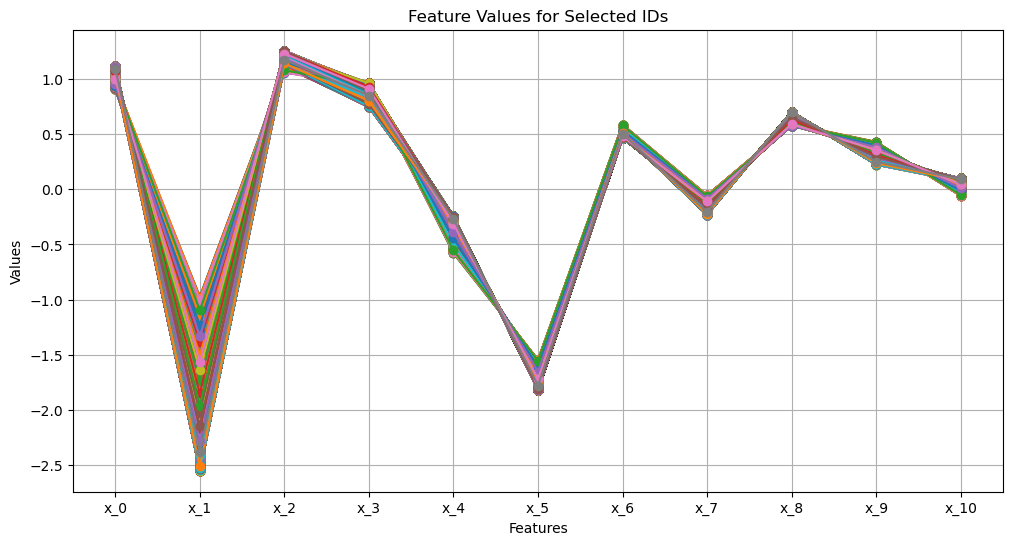

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_features_for_ids(train_data, id_column, feature_columns, target_ids):
    plt.figure(figsize=(12, 6))
    
    for unique_id in target_ids:
        subset = train_data[train_data[id_column] == unique_id]
        plt.plot(feature_columns, subset[feature_columns].values.flatten(), marker='o', label=f'ID {unique_id}')
    
    plt.title('Feature Values for Selected IDs')
    plt.xlabel('Features')
    plt.ylabel('Values')
    # plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# 예시 데이터프레임 설정
# train_data = pd.read_csv('your_file.csv')  # 이미 로드된 데이터프레임이 있다고 가정합니다

# ID 컬럼 이름과 feature 컬럼 리스트 설정
id_column = 'ID'  # ID 컬럼의 실제 이름으로 대체해야 함
feature_columns = train_data.columns[1:12]  # 첫 번째 컬럼을 제외한 나머지 컬럼들

# 시각화할 특정 ID 리스트 설정
index_range = range(0, len(train_data))  # 인덱스 0부터 9까지
target_ids = train_data[id_column].iloc[index_range].tolist() 

# 시각화 실행
plot_features_for_ids(train_data, id_column, feature_columns, target_ids)

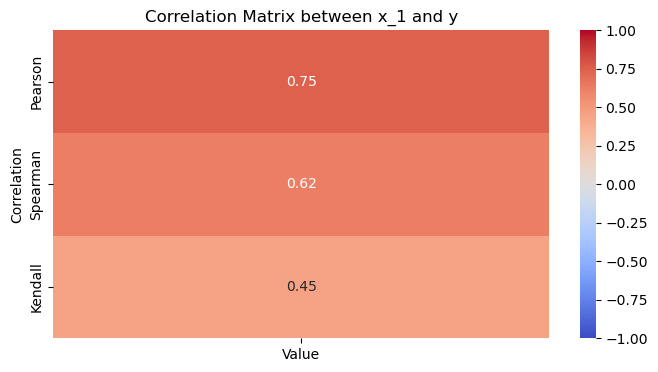

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

# 데이터 로드 (train_data가 이미 로드되어 있다고 가정)
# train_data = pd.read_csv('your_file.csv')

# x_1과 y 값 추출
x_1 = train_data['x_1']
y = train_data['y']  # y 값이 저장된 컬럼 이름을 실제 데이터에 맞게 변경해야 합니다.

# 피어슨 상관계수 계산
pearson_corr, _ = pearsonr(x_1, y)

# 스피어만 상관계수 계산
spearman_corr, _ = spearmanr(x_1, y)

# 켄달의 타우 상관계수 계산
kendall_corr, _ = kendalltau(x_1, y)

# 상관계수 매트릭스 생성
corr_matrix = pd.DataFrame({
    'Correlation': ['Pearson', 'Spearman', 'Kendall'],
    'Value': [pearson_corr, spearman_corr, kendall_corr]
}).set_index('Correlation')

# 상관계수 매트릭스 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Matrix between x_1 and y')
plt.show()

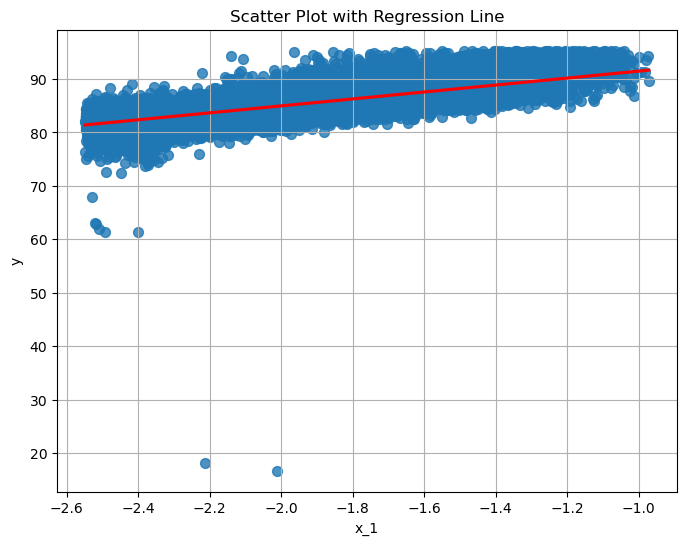

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 생성 (이미 데이터프레임이 있다고 가정)

# 산점도와 회귀선 그리기
plt.figure(figsize=(8, 6))
sns.regplot(x='x_1', y='y', data=train_data, scatter_kws={'s':50}, line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('x_1')
plt.ylabel('y')
plt.grid(True)
plt.show()

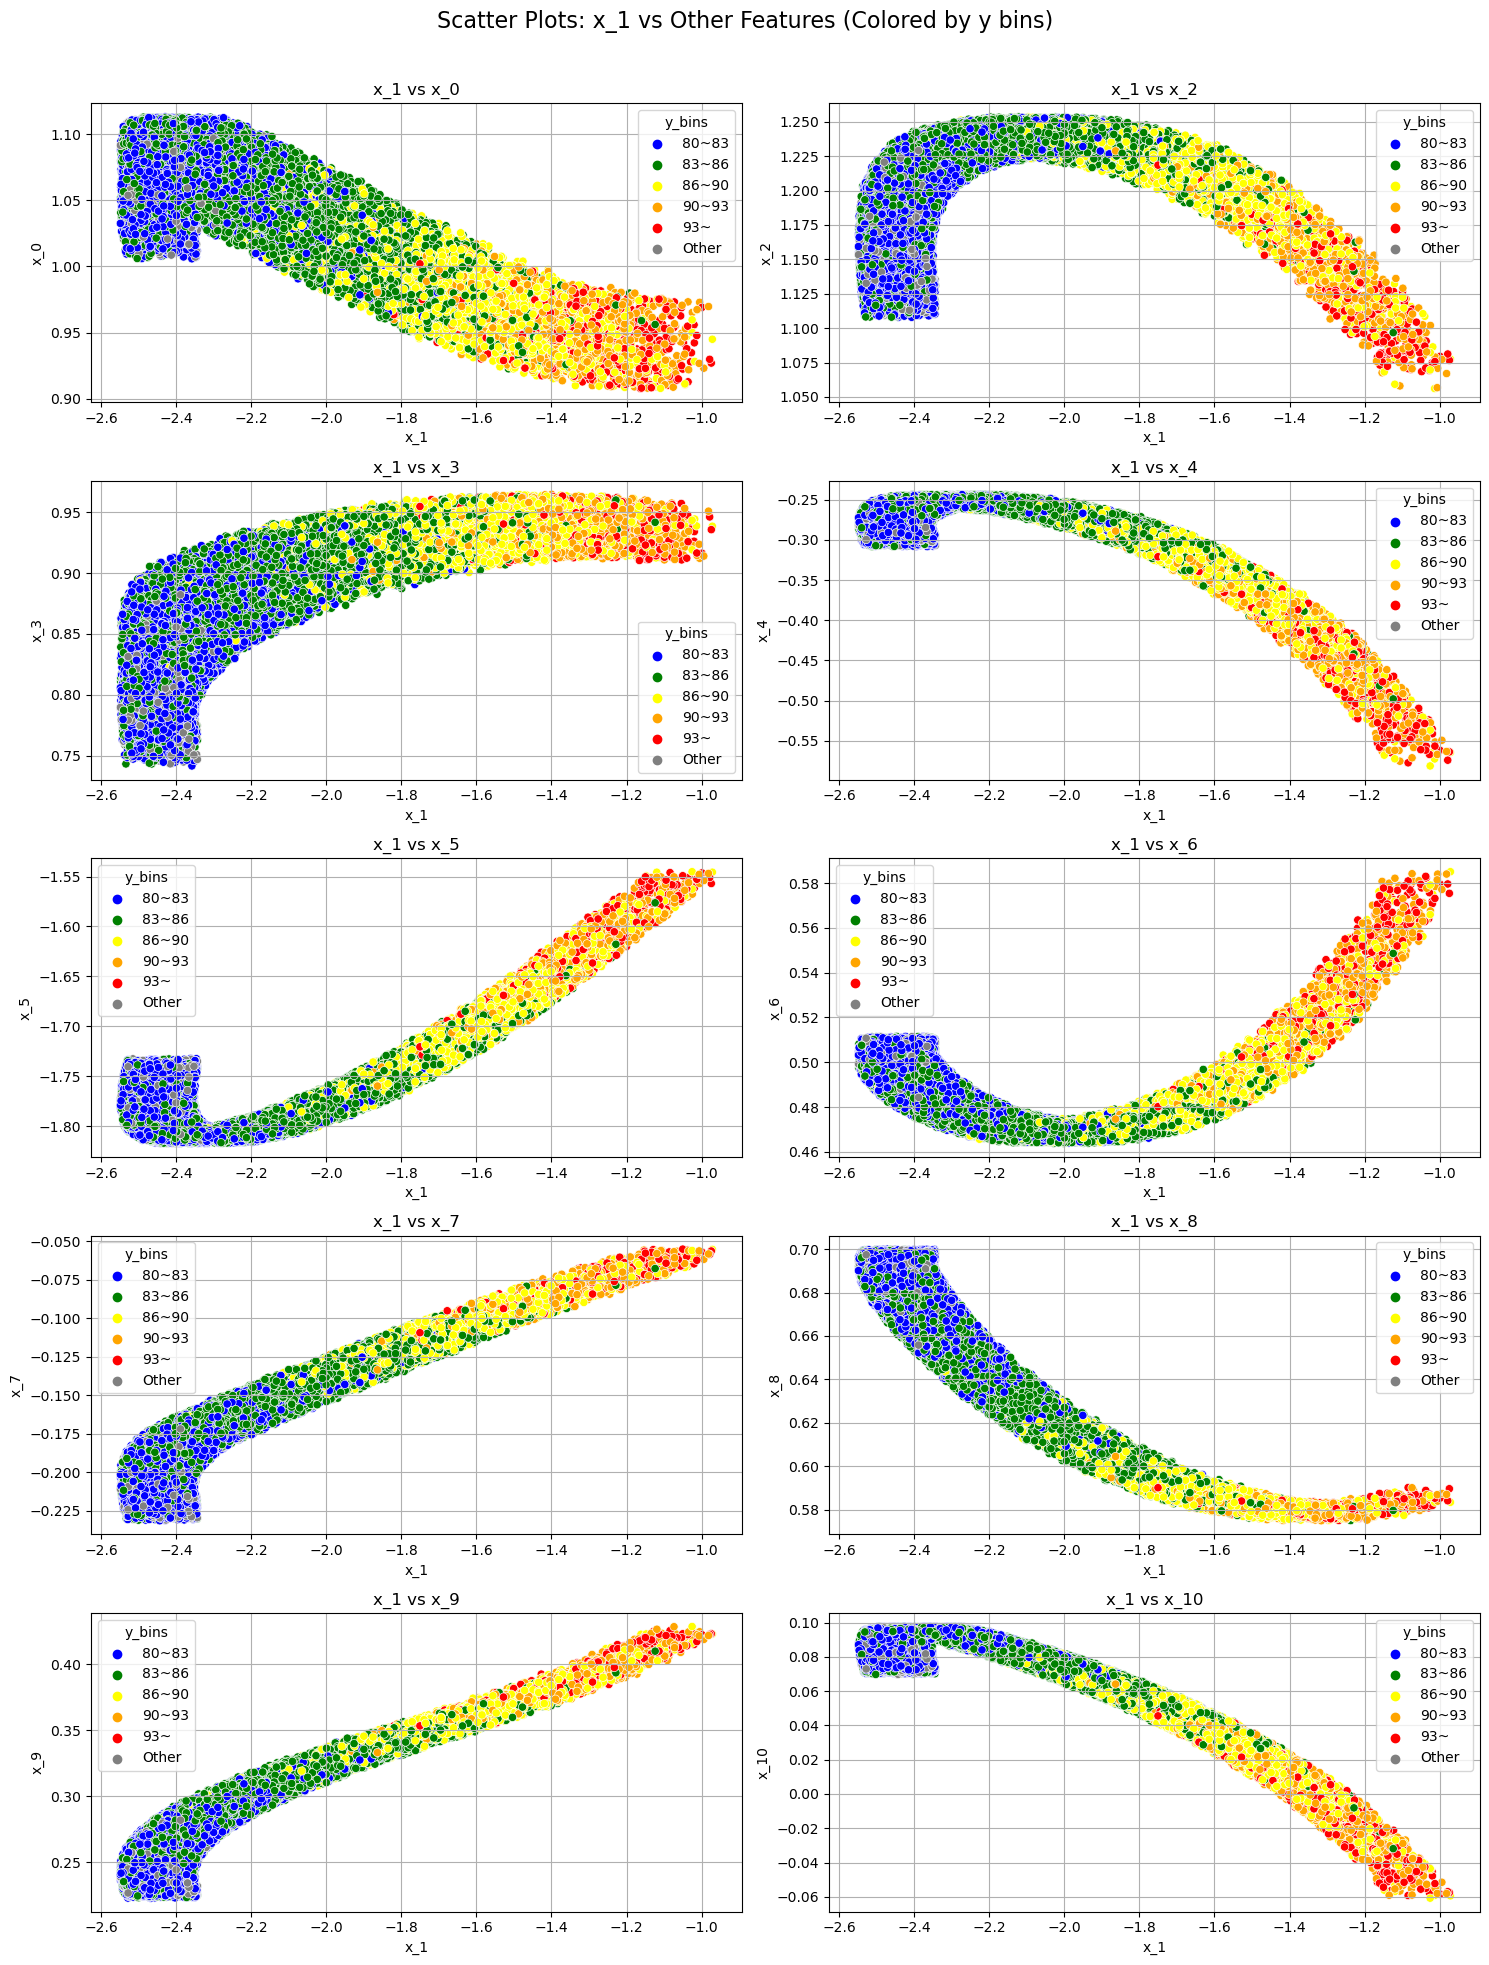

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# y 값을 구간으로 나누기
bins = [80, 83, 86, 90, 93, float('inf')]
labels = ['80~83', '83~86', '86~90', '90~93', '93~']
train_data['y_bins'] = pd.cut(train_data['y'], bins=bins, labels=labels, include_lowest=True, right=False)

# y 값이 구간 밖인 데이터는 'Other'로 설정
train_data['y_bins'] = train_data['y_bins'].cat.add_categories('Other').fillna('Other')

# 피처 리스트 설정
feature_columns = ['x_0'] + [f'x_{i}' for i in range(2, 11)]

# 서브플롯 생성 (5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Scatter Plots: x_1 vs Other Features (Colored by y bins)', fontsize=16)

# 각 피처에 대해 산점도 그리기
palette = {
    '80~83': 'blue',
    '83~86': 'green',
    '86~90': 'yellow',
    '90~93': 'orange',
    '93~': 'red',
    'Other': 'gray'
}

for i, feature in enumerate(feature_columns):
    row = i // 2
    col = i % 2
    sns.scatterplot(x='x_1', y=feature, hue='y_bins', data=train_data, ax=axes[row, col], palette=palette)
    axes[row, col].set_title(f'x_1 vs {feature}')
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # suptitle과 겹치지 않도록 조정
plt.show()

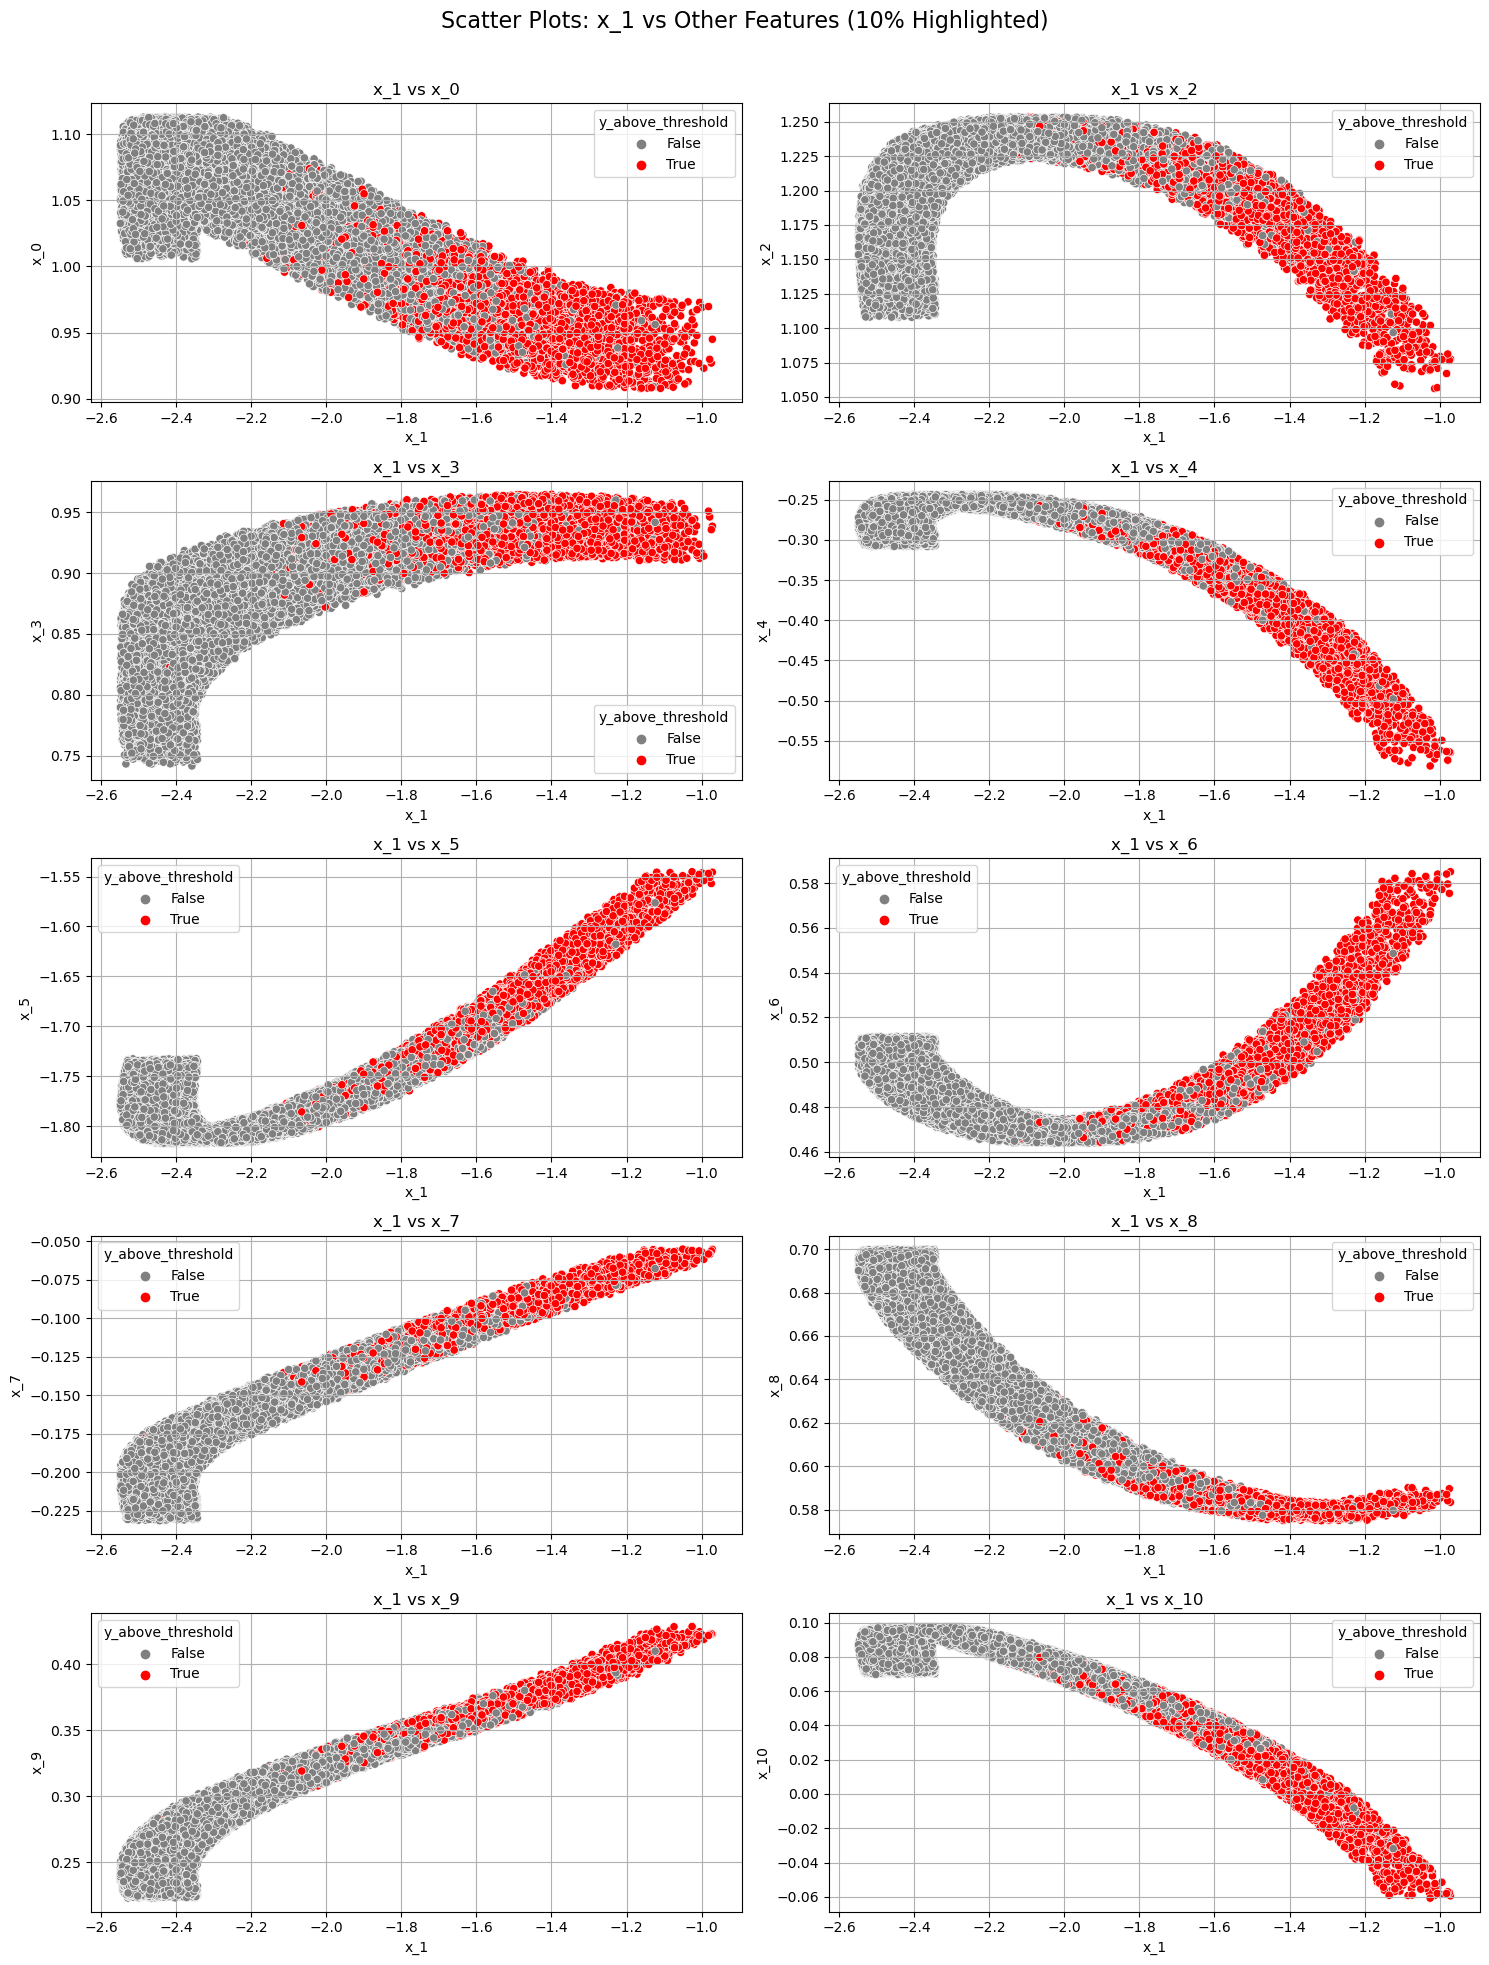

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 생성 (이미 데이터프레임이 있다고 가정)
# data = pd.read_csv('your_data.csv')  # 이미 로드된 데이터프레임을 사용하세요.

# y 값이 threshold 이상인지 여부를 나타내는 새로운 컬럼 추가
threshold = train_data['y'].quantile(0.9)
train_data['y_above_threshold'] = train_data['y'] >= threshold

# 피처 리스트 설정
feature_columns = ['x_0'] + [f'x_{i}' for i in range(2, 11)]

# 서브플롯 생성 (5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Scatter Plots: x_1 vs Other Features (10% Highlighted)', fontsize=16)

# 각 피처에 대해 산점도 그리기
for i, feature in enumerate(feature_columns):
    row = i // 2
    col = i % 2
    sns.scatterplot(x='x_1', y=feature, hue='y_above_threshold', data=train_data, ax=axes[row, col], palette={True: 'red', False: 'gray'})
    axes[row, col].set_title(f'x_1 vs {feature}')
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # suptitle과 겹치지 않도록 조정
plt.show()


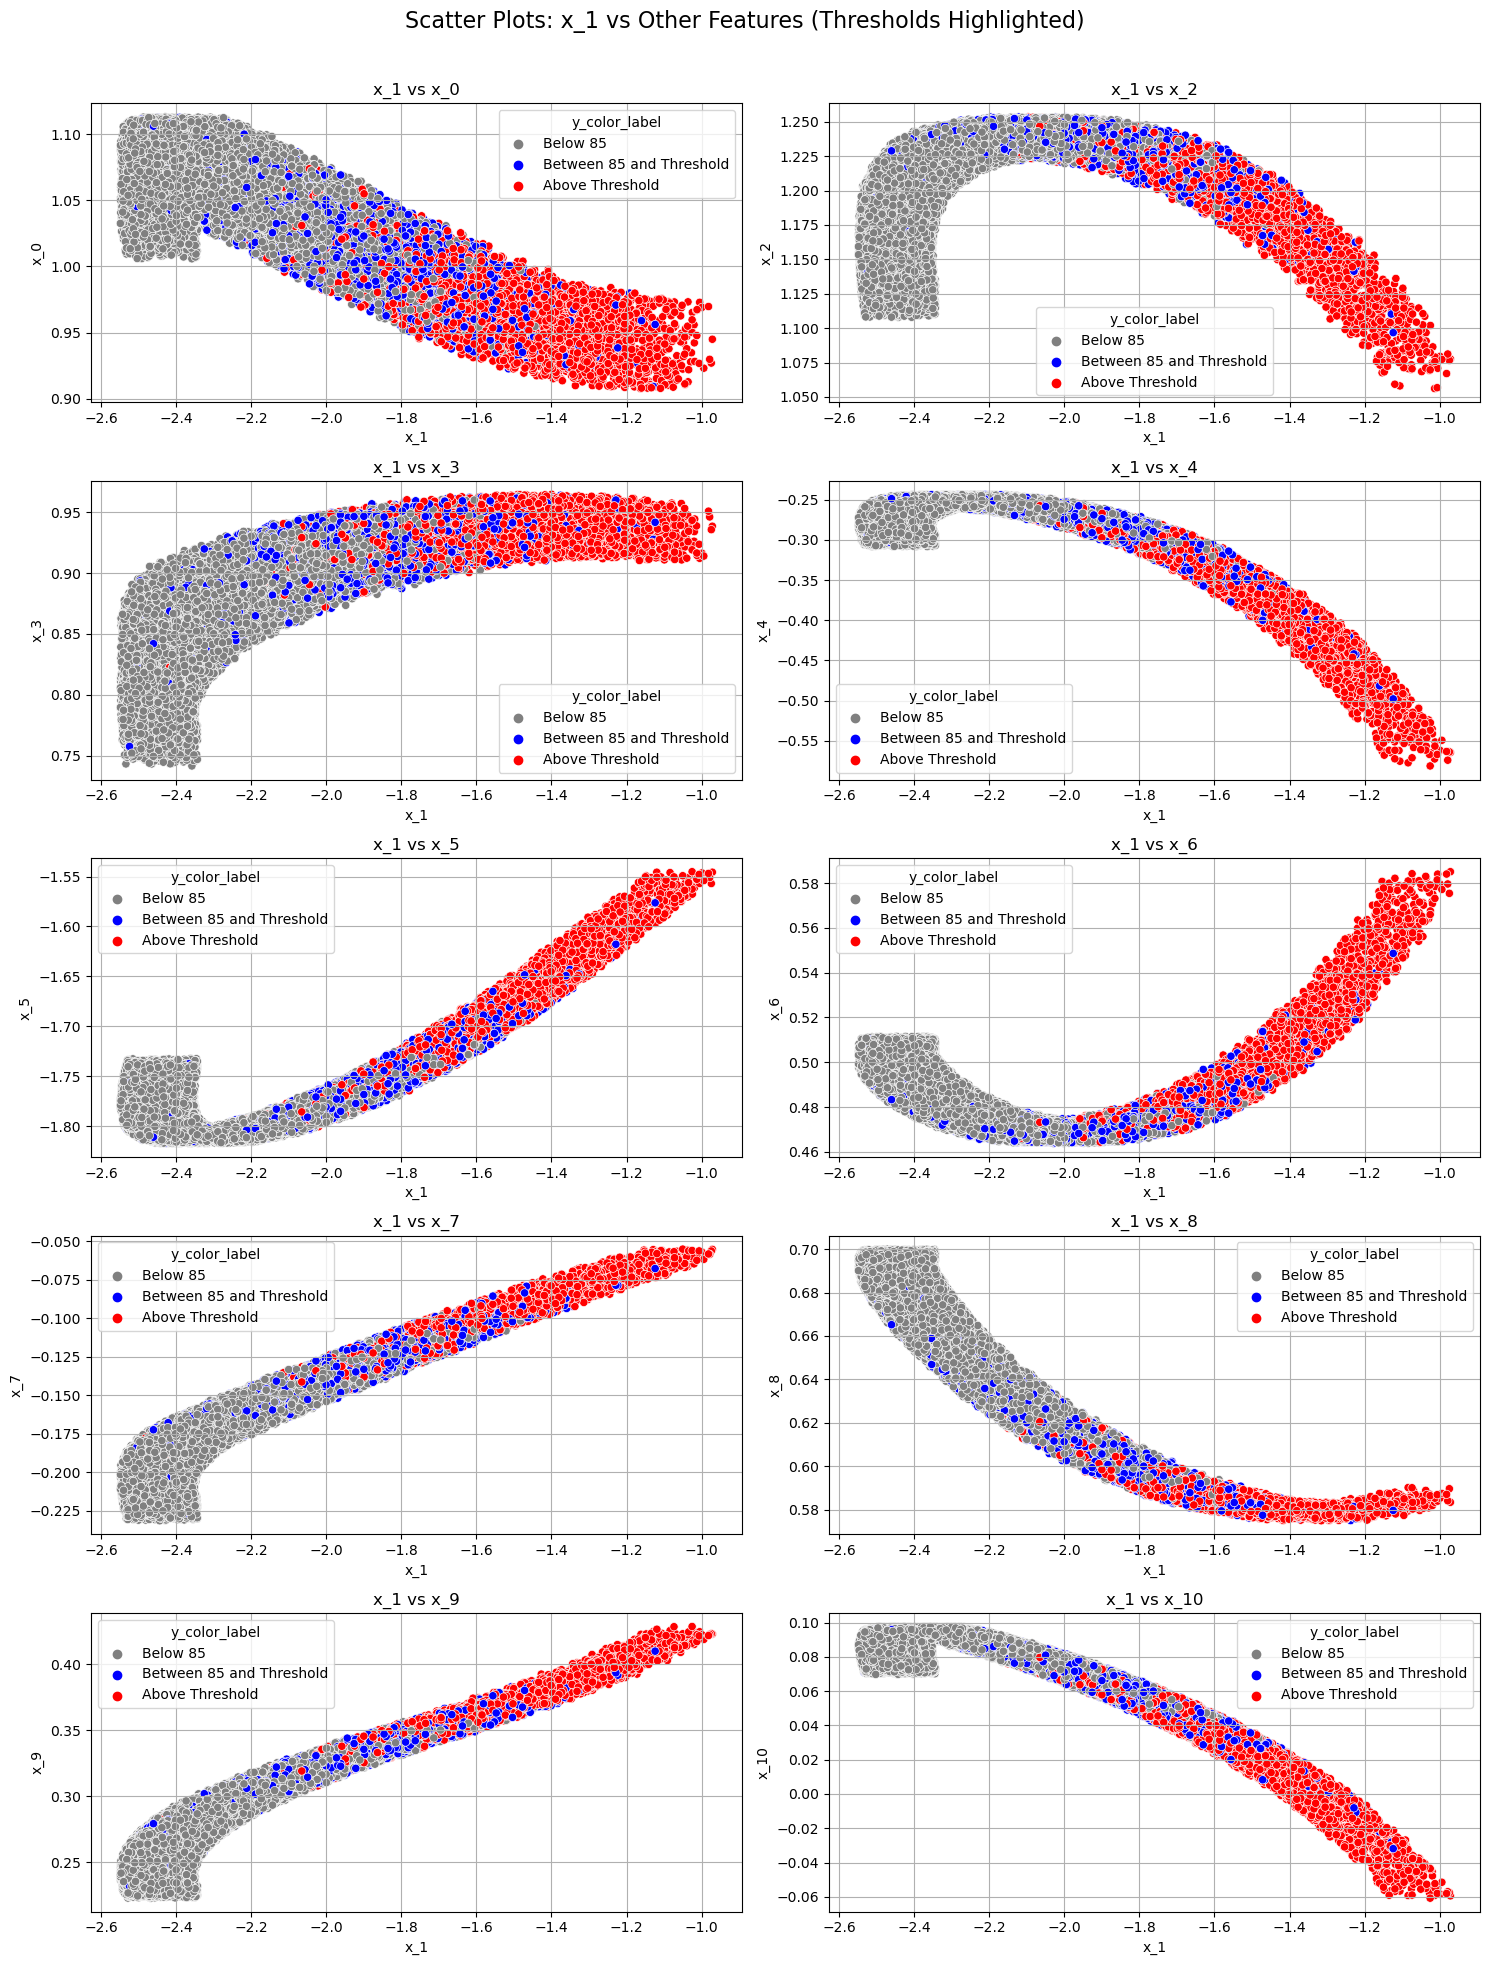

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 생성 (이미 데이터프레임이 있다고 가정)
# data = pd.read_csv('your_data.csv')  # 이미 로드된 데이터프레임을 사용하세요.

# y 값이 threshold 이상인지, 85에서 threshold 사이인지 여부를 나타내는 새로운 컬럼 추가
threshold = train_data['y'].quantile(0.9)

def color_label(y):
    if y >= threshold:
        return 'Above Threshold'
    elif 85 <= y < threshold:
        return 'Between 85 and Threshold'
    else:
        return 'Below 85'

train_data['y_color_label'] = train_data['y'].apply(color_label)

# 피처 리스트 설정
feature_columns = ['x_0'] + [f'x_{i}' for i in range(2, 11)]

# 서브플롯 생성 (5행 2열)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Scatter Plots: x_1 vs Other Features (Thresholds Highlighted)', fontsize=16)

# 각 피처에 대해 산점도 그리기
for i, feature in enumerate(feature_columns):
    row = i // 2
    col = i % 2
    sns.scatterplot(x='x_1', y=feature, hue='y_color_label', data=train_data, ax=axes[row, col],
                    palette={'Above Threshold': 'red', 'Between 85 and Threshold': 'blue', 'Below 85': 'gray'})
    axes[row, col].set_title(f'x_1 vs {feature}')
    axes[row, col].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # suptitle과 겹치지 않도록 조정
plt.show()

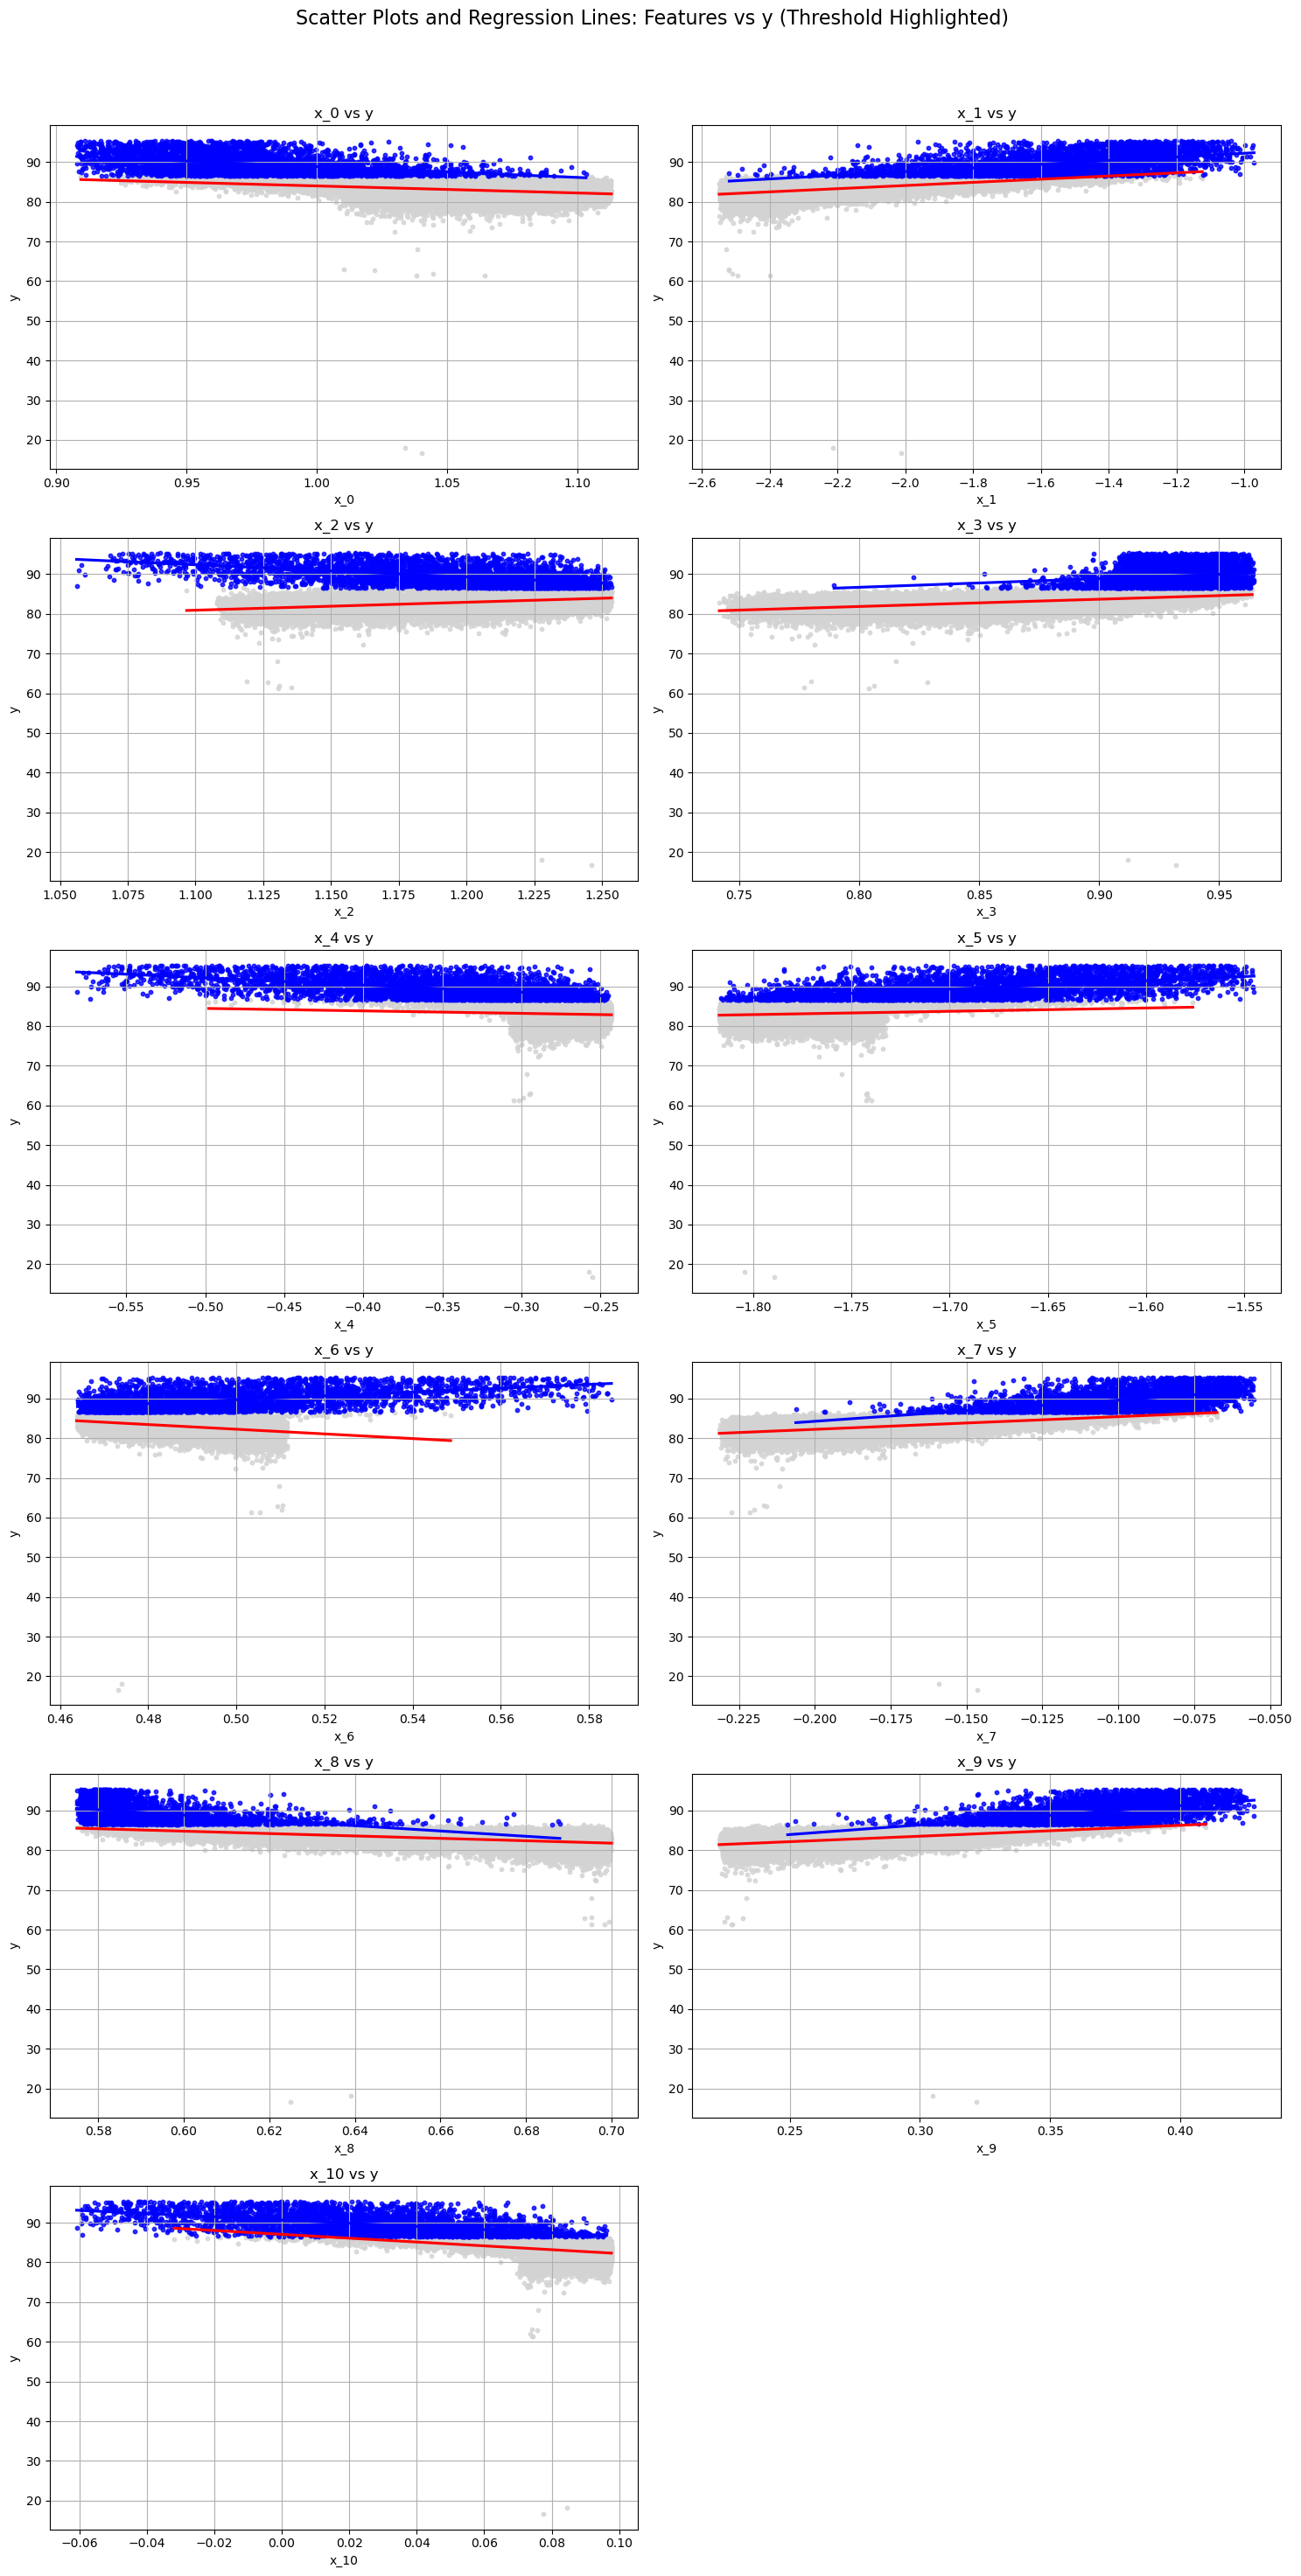

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# threshold 설정 (상위 10% 데이터 필터링)
threshold = train_data['y'].quantile(0.9)
above_threshold_data = train_data[train_data['y'] >= threshold]
below_threshold_data = train_data[train_data['y'] < threshold]

# 피처 리스트 설정
feature_columns = [f'x_{i}' for i in range(11)]

# 서브플롯 생성 (6행 2열)
fig, axes = plt.subplots(6, 2, figsize=(15, 30))
fig.suptitle('Scatter Plots and Regression Lines: Features vs y (Threshold Highlighted)', fontsize=16)

# 각 피처에 대해 산점도와 회귀선 그리기
for i, feature in enumerate(feature_columns):
    row = i // 2
    col = i % 2
    
    # 전체 데이터 회색으로 표시
    sns.regplot(x=feature, y='y', data=below_threshold_data, ax=axes[row, col], scatter_kws={'s': 10, 'color': 'lightgray'}, line_kws={'color': 'red'}, ci=None)
    
    # 상위 10% 데이터 별도 색상으로 표시
    sns.regplot(x=feature, y='y', data=above_threshold_data, ax=axes[row, col], scatter_kws={'s': 10, 'color': 'blue'}, line_kws={'color': 'blue'}, ci=None)
    
    axes[row, col].set_title(f'{feature} vs y')
    axes[row, col].grid(True)

# 남은 빈 플롯 제거 (6x2 플롯에 11개의 플롯이므로 마지막 하나는 빈 공간)
fig.delaxes(axes[5, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitle과 겹치지 않도록 조정
plt.show()

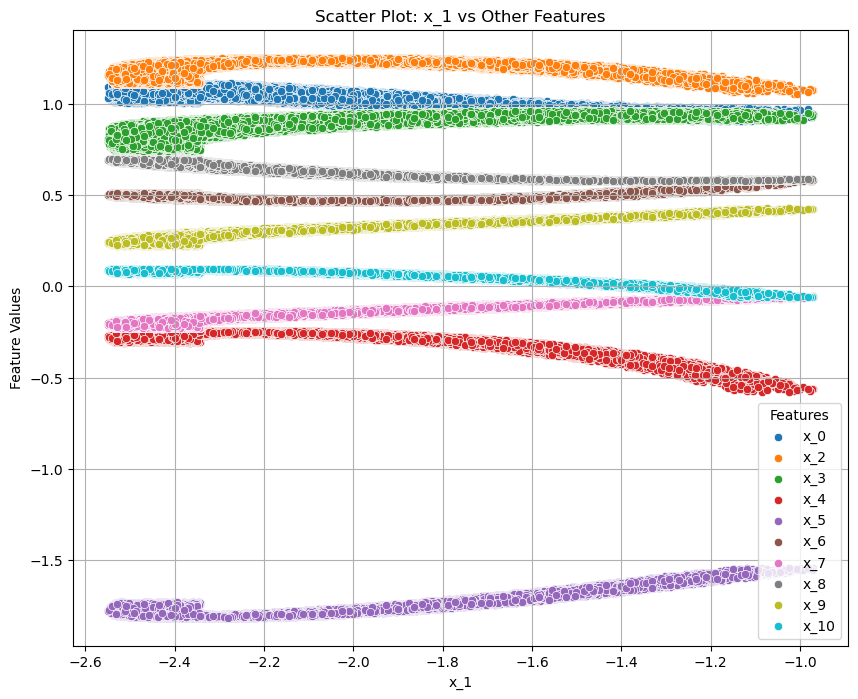

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 필요한 변수만 선택
features = ['x_0'] + [f'x_{i}' for i in range(2, 11)]

# 하나의 플롯에 모든 변수의 관계 표현
plt.figure(figsize=(10, 8))
for feature in features:
    sns.scatterplot(x='x_1', y=feature, data=train_data, label=feature)

plt.title('Scatter Plot: x_1 vs Other Features')
plt.xlabel('x_1')
plt.ylabel('Feature Values')
plt.legend(title='Features')
plt.grid(True)
plt.show()

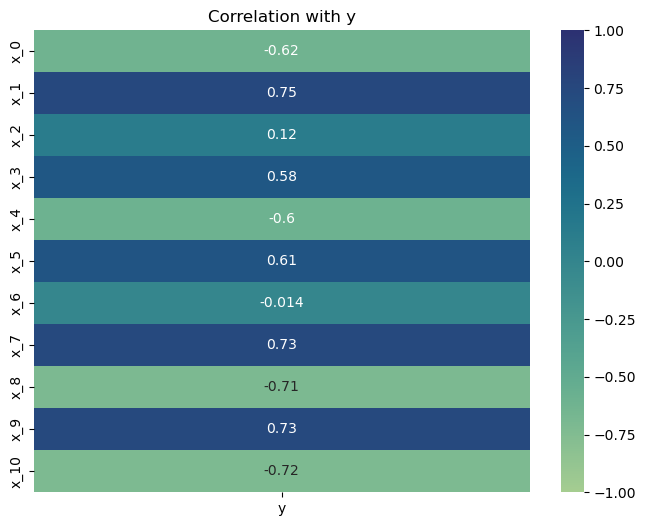

In [27]:
selected_columns = ['y', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']
correlation_matrix = train_data[selected_columns].corr()

correlation_with_y = correlation_matrix[['y']].drop('y')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_y, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlation with y')
plt.show()

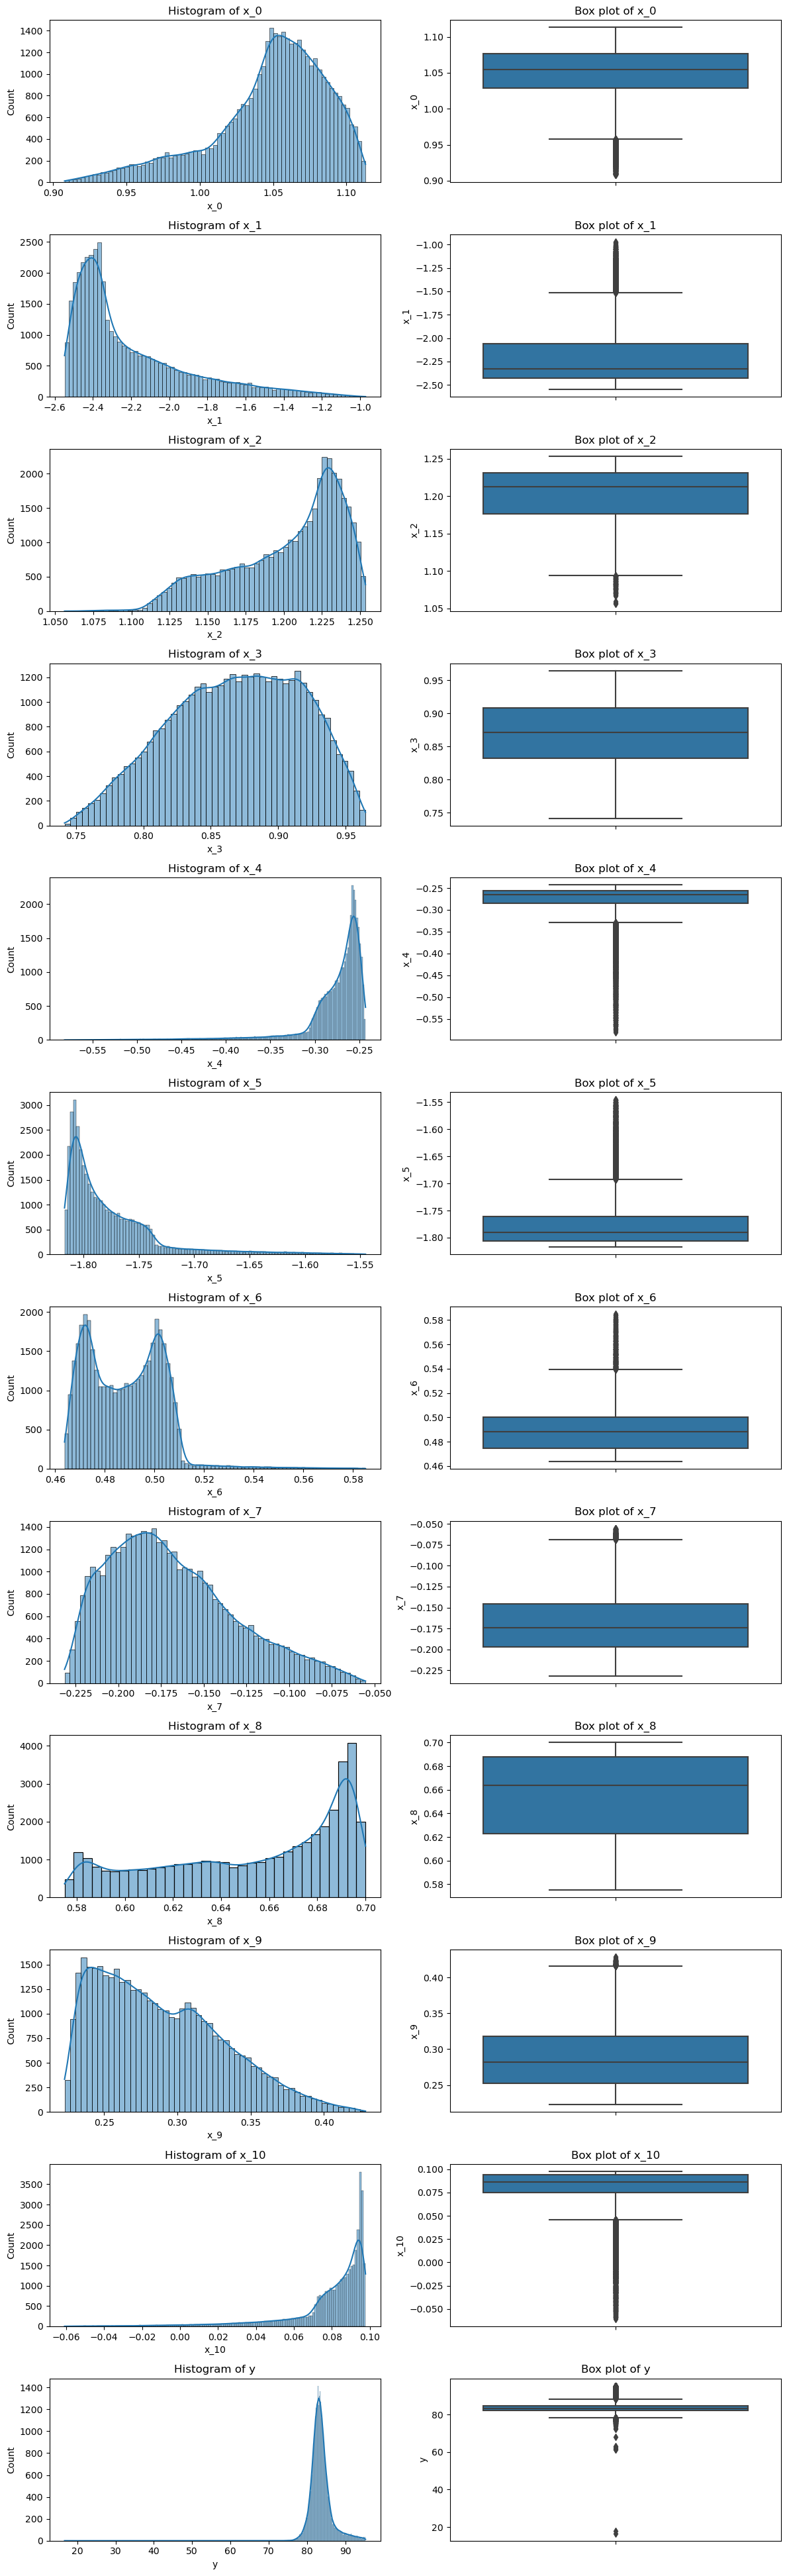

In [4]:
# Create combined plots (histogram + boxplot)
fig, axes = plt.subplots(len(train_data.columns) - 1, 2, figsize=(12, len(train_data.columns) * 3))
axes = axes.ravel()

for i, col in enumerate(train_data.columns[1:]):  # Skip the ID column
    # Histogram
    sns.histplot(train_data[col], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(y=train_data[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

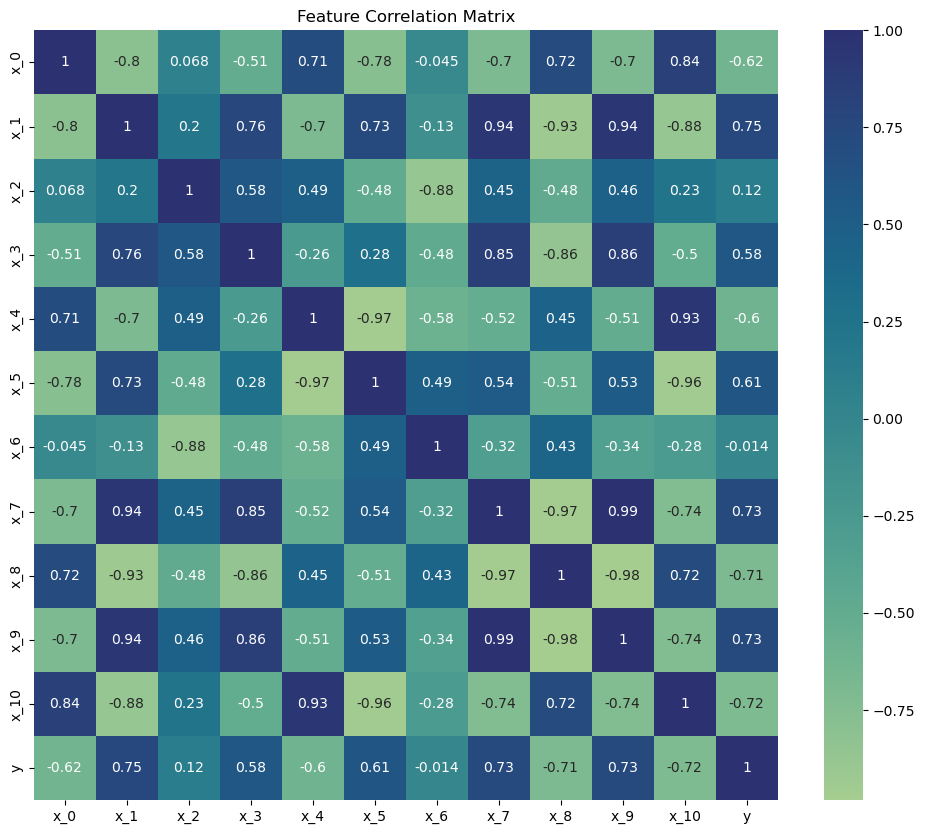

In [5]:
# Check for correlations
correlation_matrix = train_data.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()

## Train, Test 분포 비교

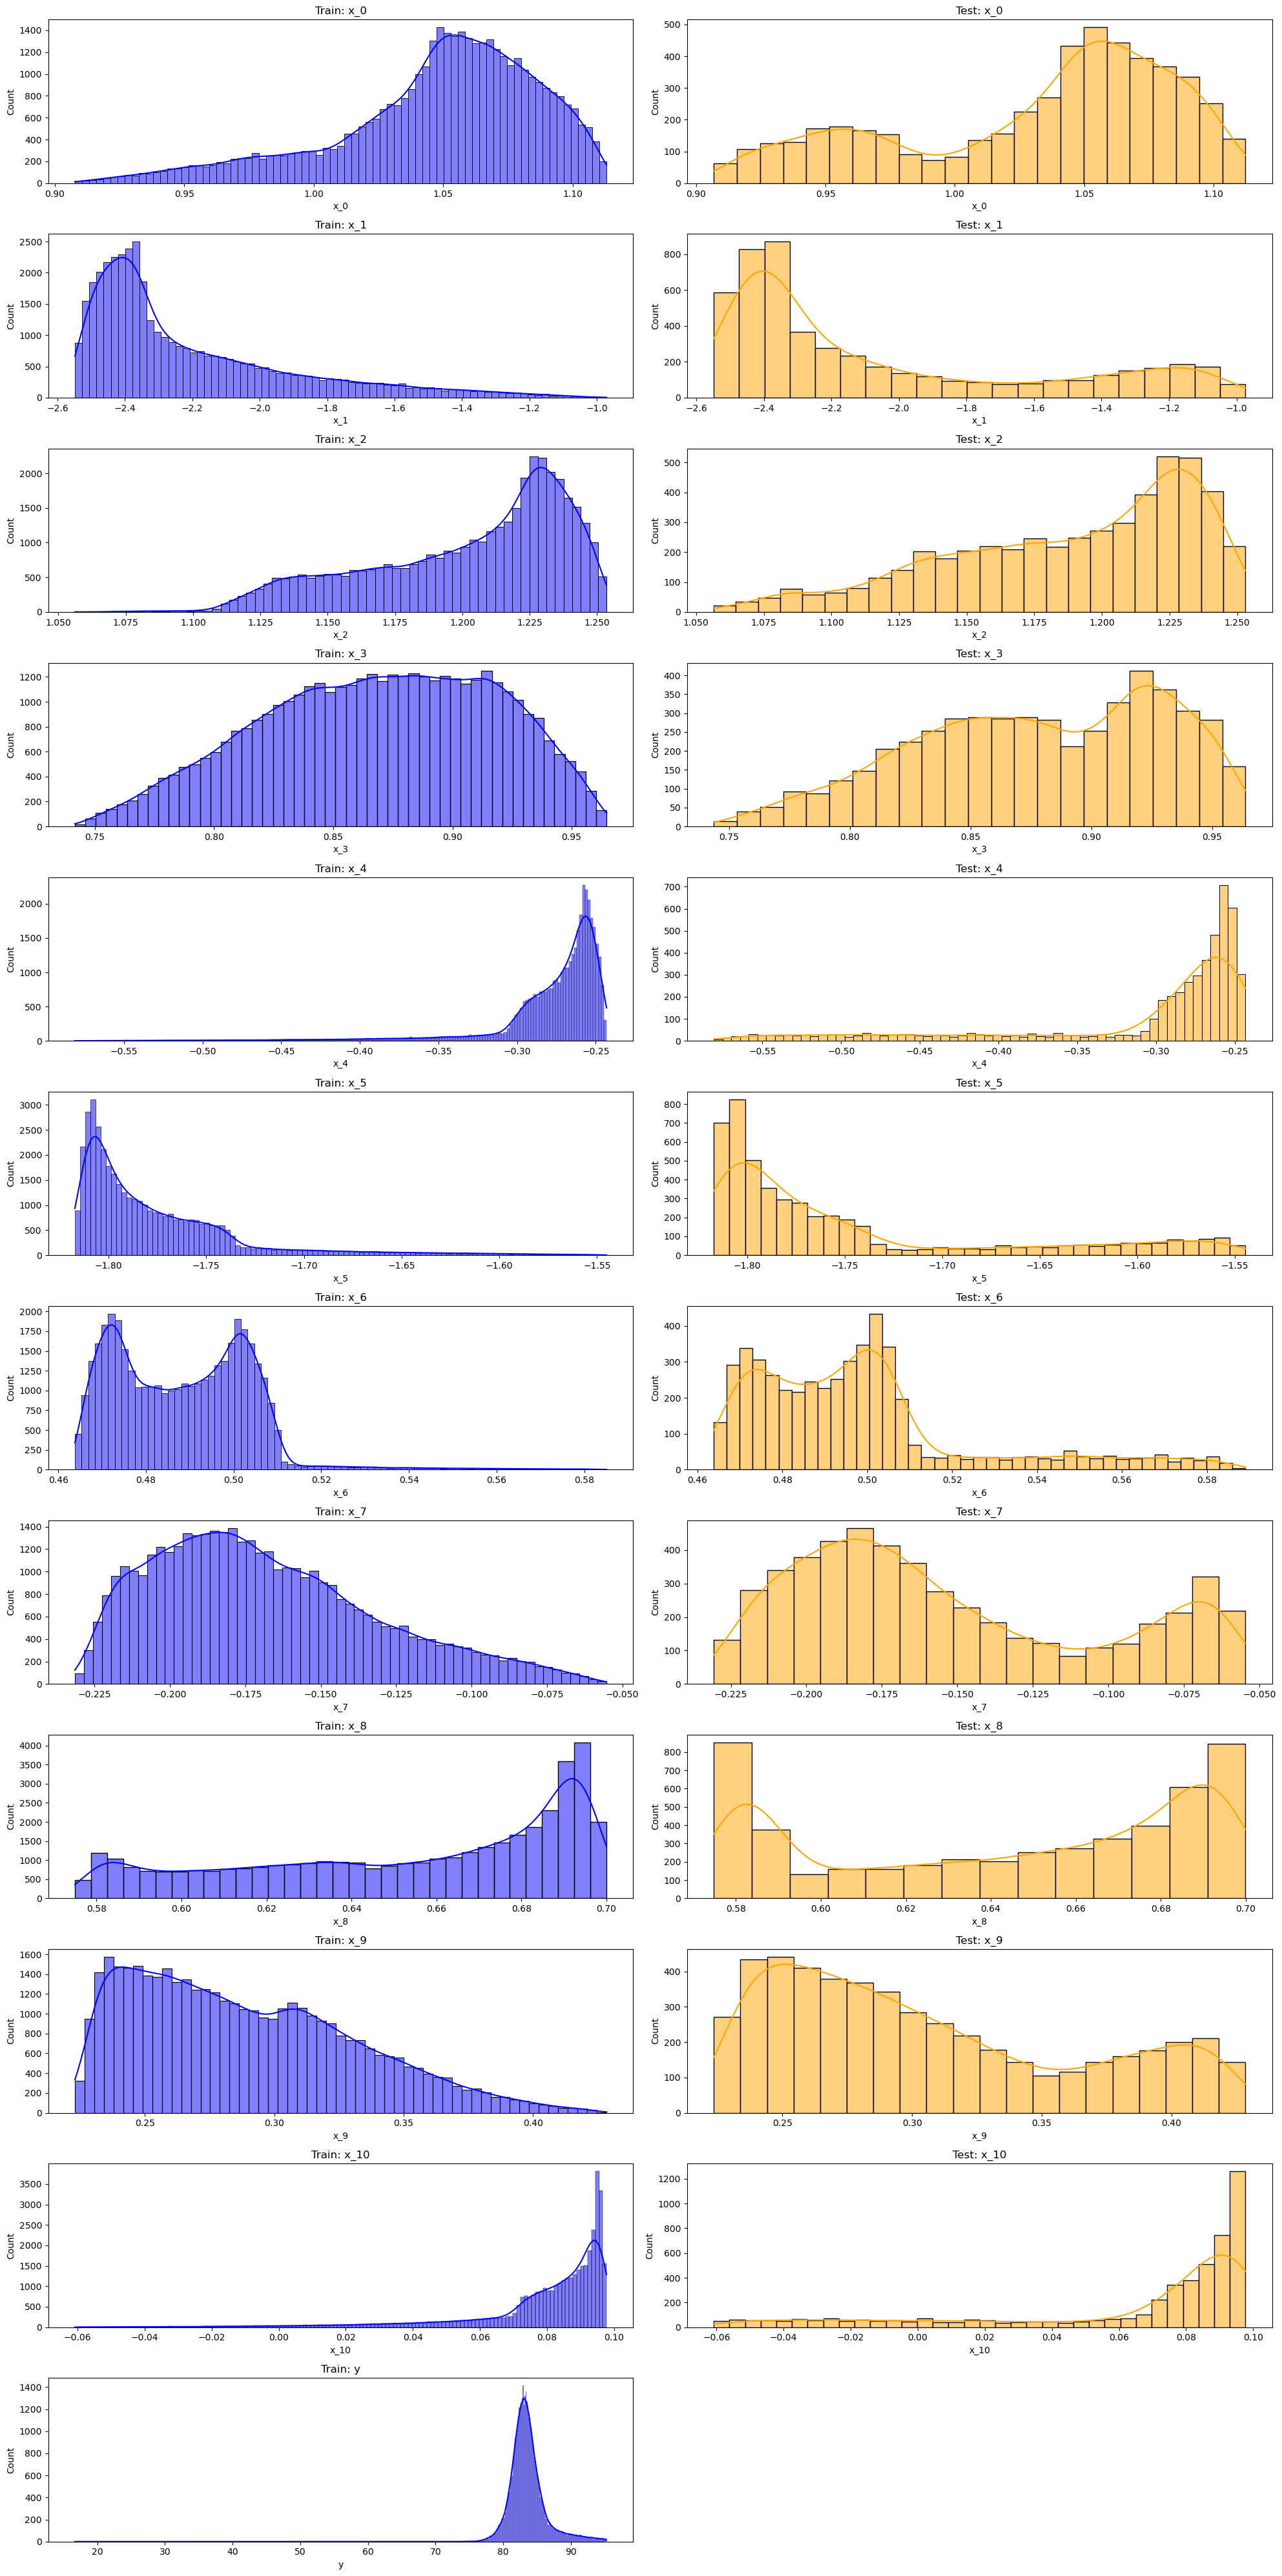

In [3]:
# Load the data
df = pd.read_csv('./train.csv')
df2 = pd.read_csv('./test.csv')

# Create histograms for each variable
fig, axes = plt.subplots(12, 2, figsize=(20, 40))  # 12x2 grid for side-by-side comparison
axes = axes.ravel()

# Plot each variable from the dataset
for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    # Plot for df (train data)
    sns.histplot(df[col], ax=axes[2*i], kde=True, color='blue')
    axes[2*i].set_title(f'Train: {col}')
    
    if col != 'y':  # Exclude y from test set
        # Plot for df2 (test data)
        sns.histplot(df2[col], ax=axes[2*i + 1], kde=True, color='orange')
        axes[2*i + 1].set_title(f'Test: {col}')
    else:
        # Hide the test plot for 'y'
        axes[2*i + 1].axis('off')

plt.tight_layout()
plt.show()

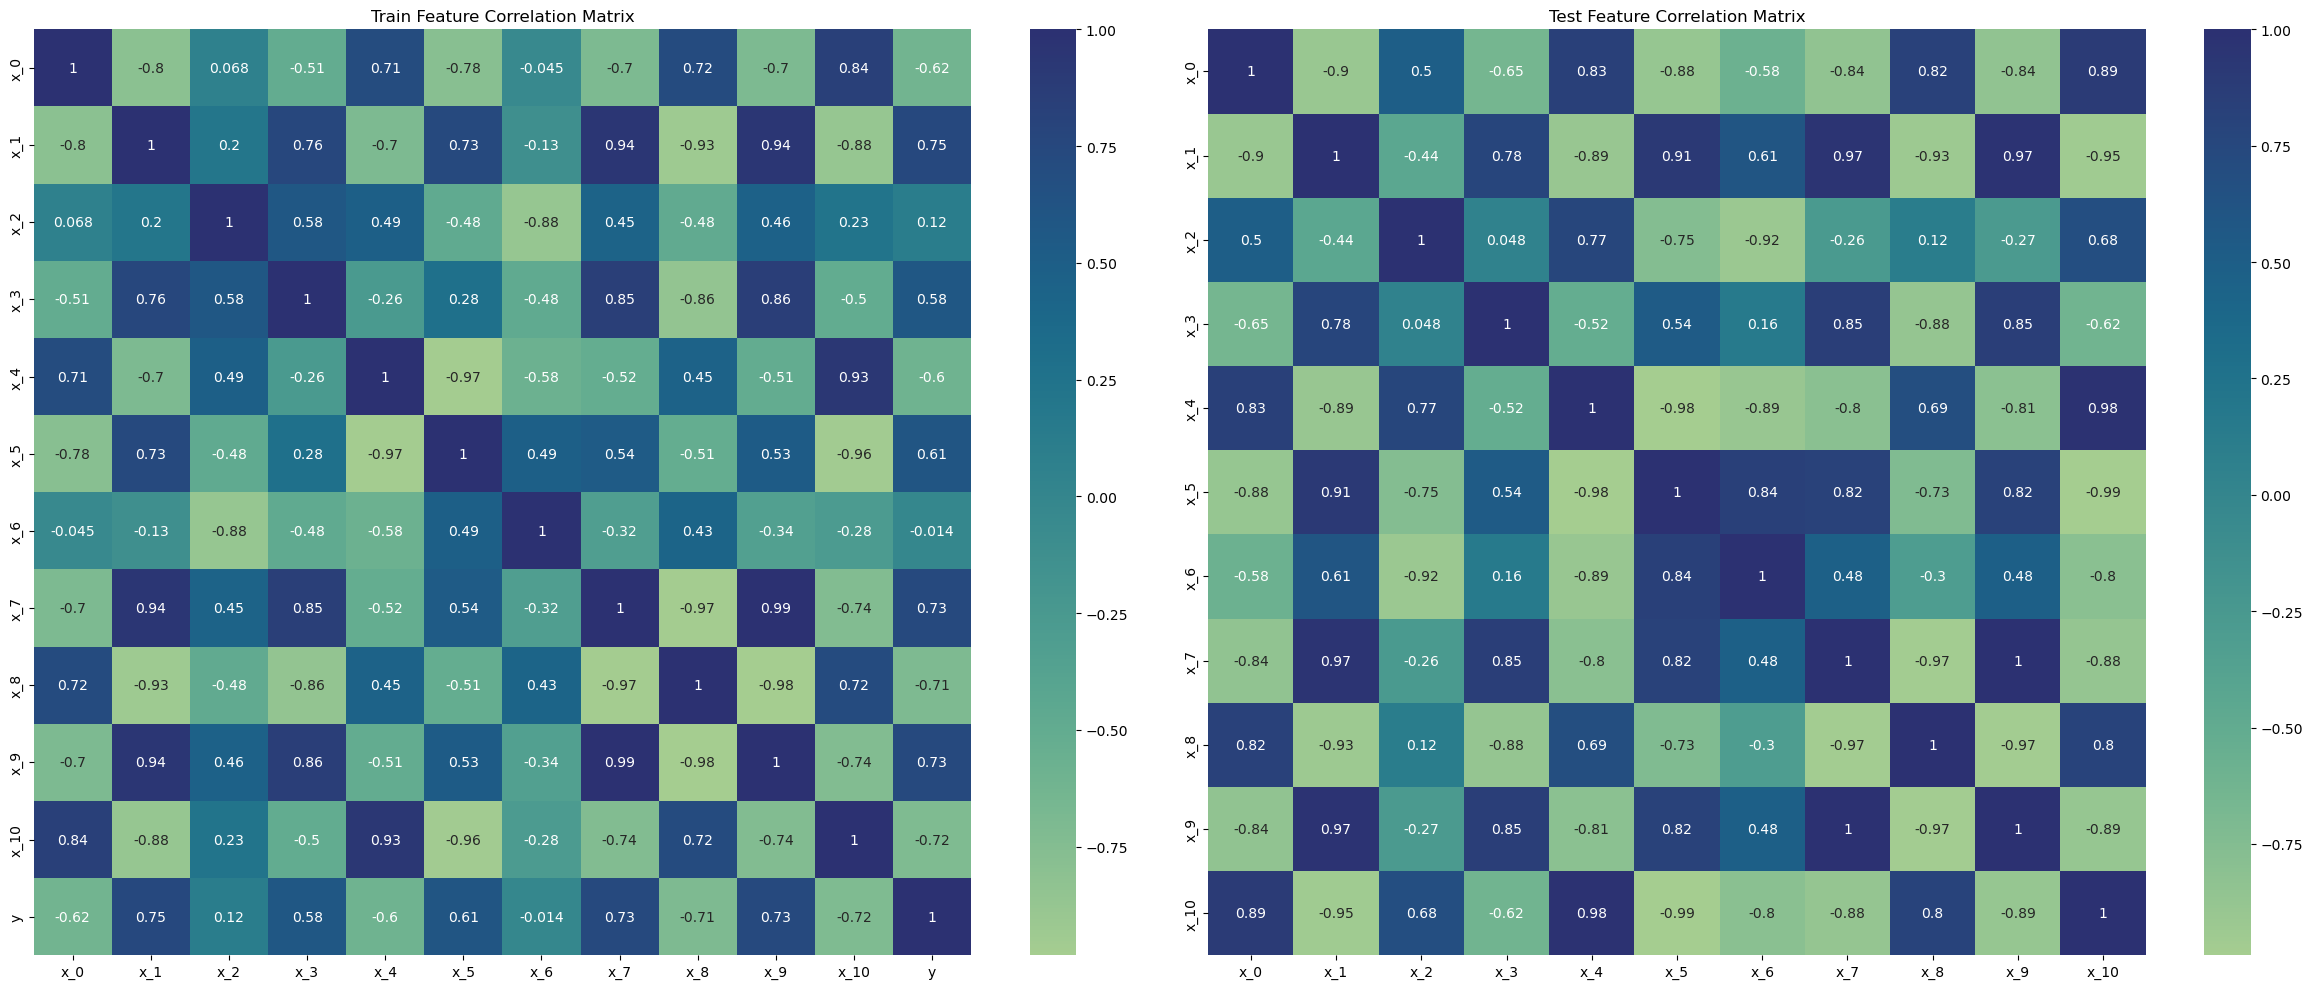

In [4]:
# Calculate correlation matrices for train and test data
correlation_matrix_train = df.iloc[:, 1:].corr()
correlation_matrix_test = df2.iloc[:, 1:].corr()

# Create side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Train data correlation matrix
sns.heatmap(correlation_matrix_train, annot=True, cmap='crest', ax=axes[0])
axes[0].set_title('Train Feature Correlation Matrix')

# Test data correlation matrix
sns.heatmap(correlation_matrix_test, annot=True, cmap='crest', ax=axes[1])
axes[1].set_title('Test Feature Correlation Matrix')

plt.tight_layout()
plt.show()

## Train.csv


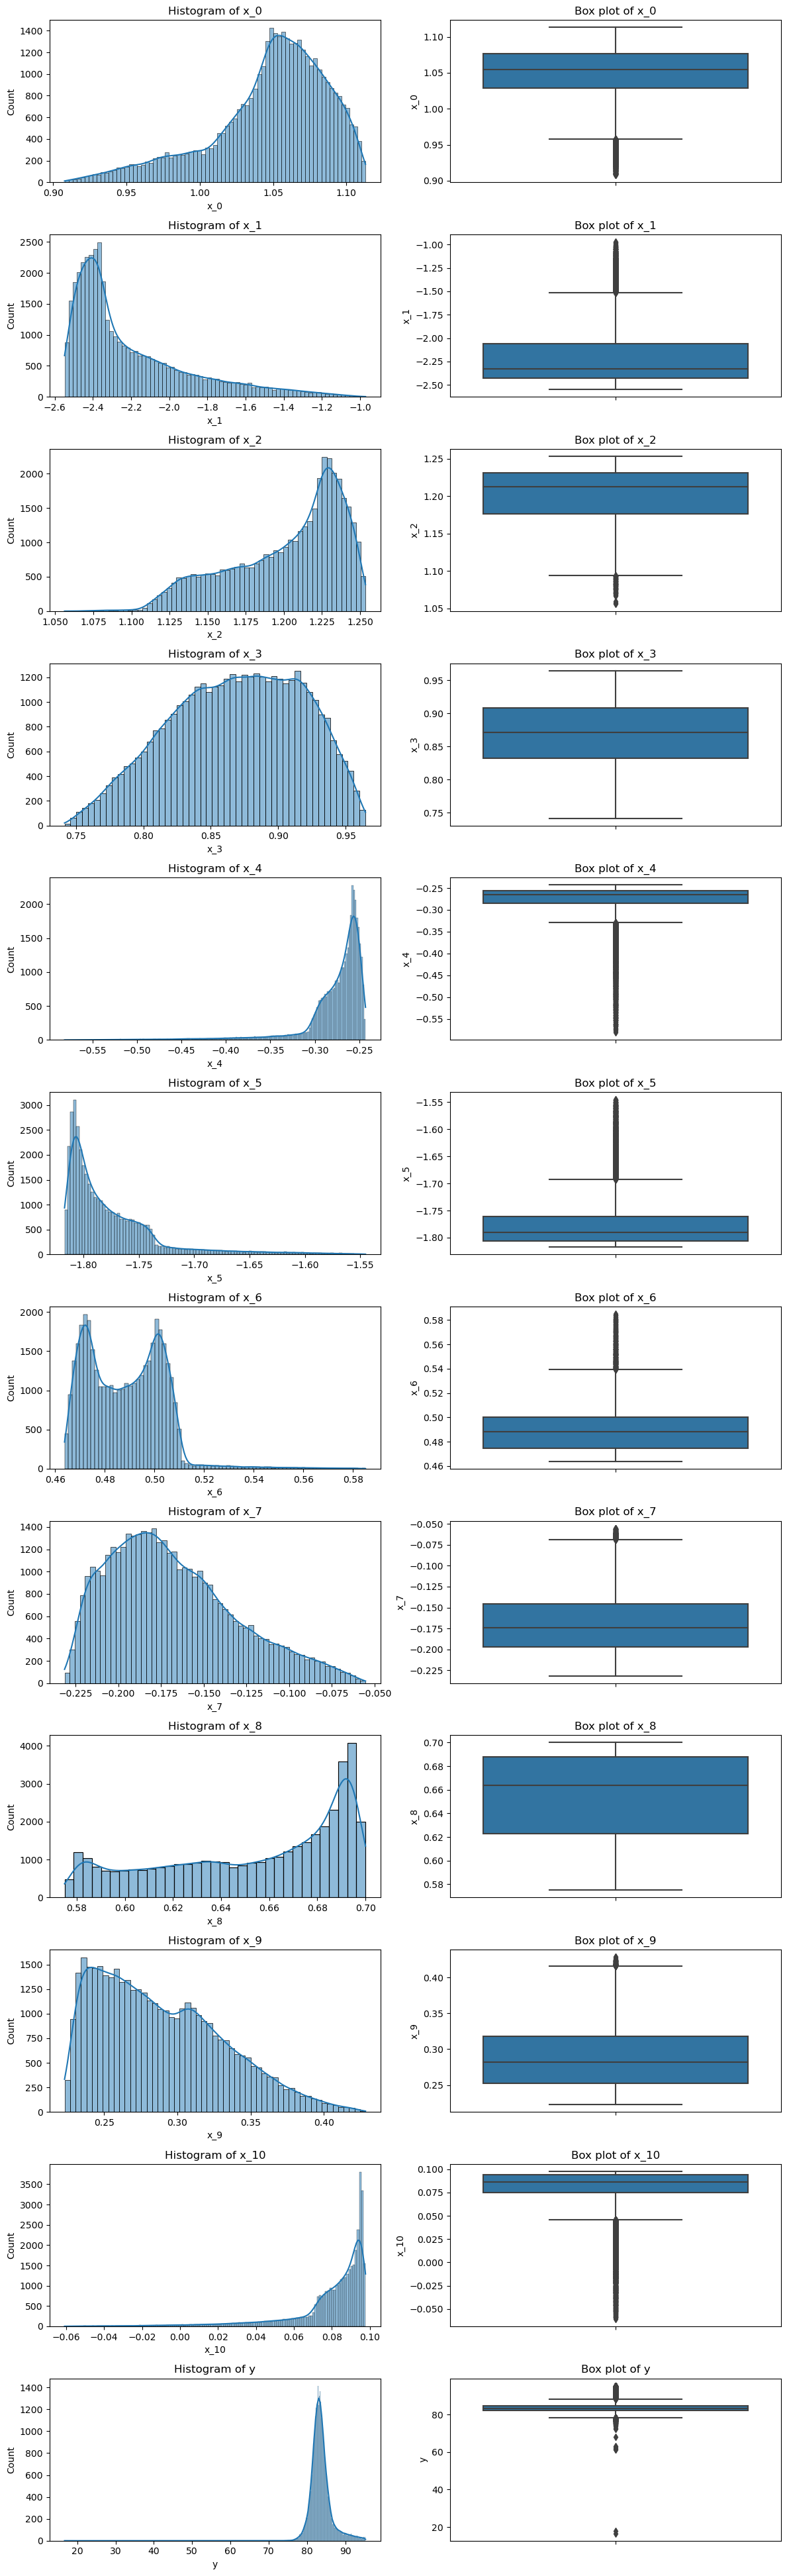

In [5]:
# Create combined plots (histogram + boxplot)
fig, axes = plt.subplots(len(df.columns) - 1, 2, figsize=(12, len(df.columns) * 3))
axes = axes.ravel()

for i, col in enumerate(df.columns[1:]):  # Skip the ID column
    # Histogram
    sns.histplot(df[col], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

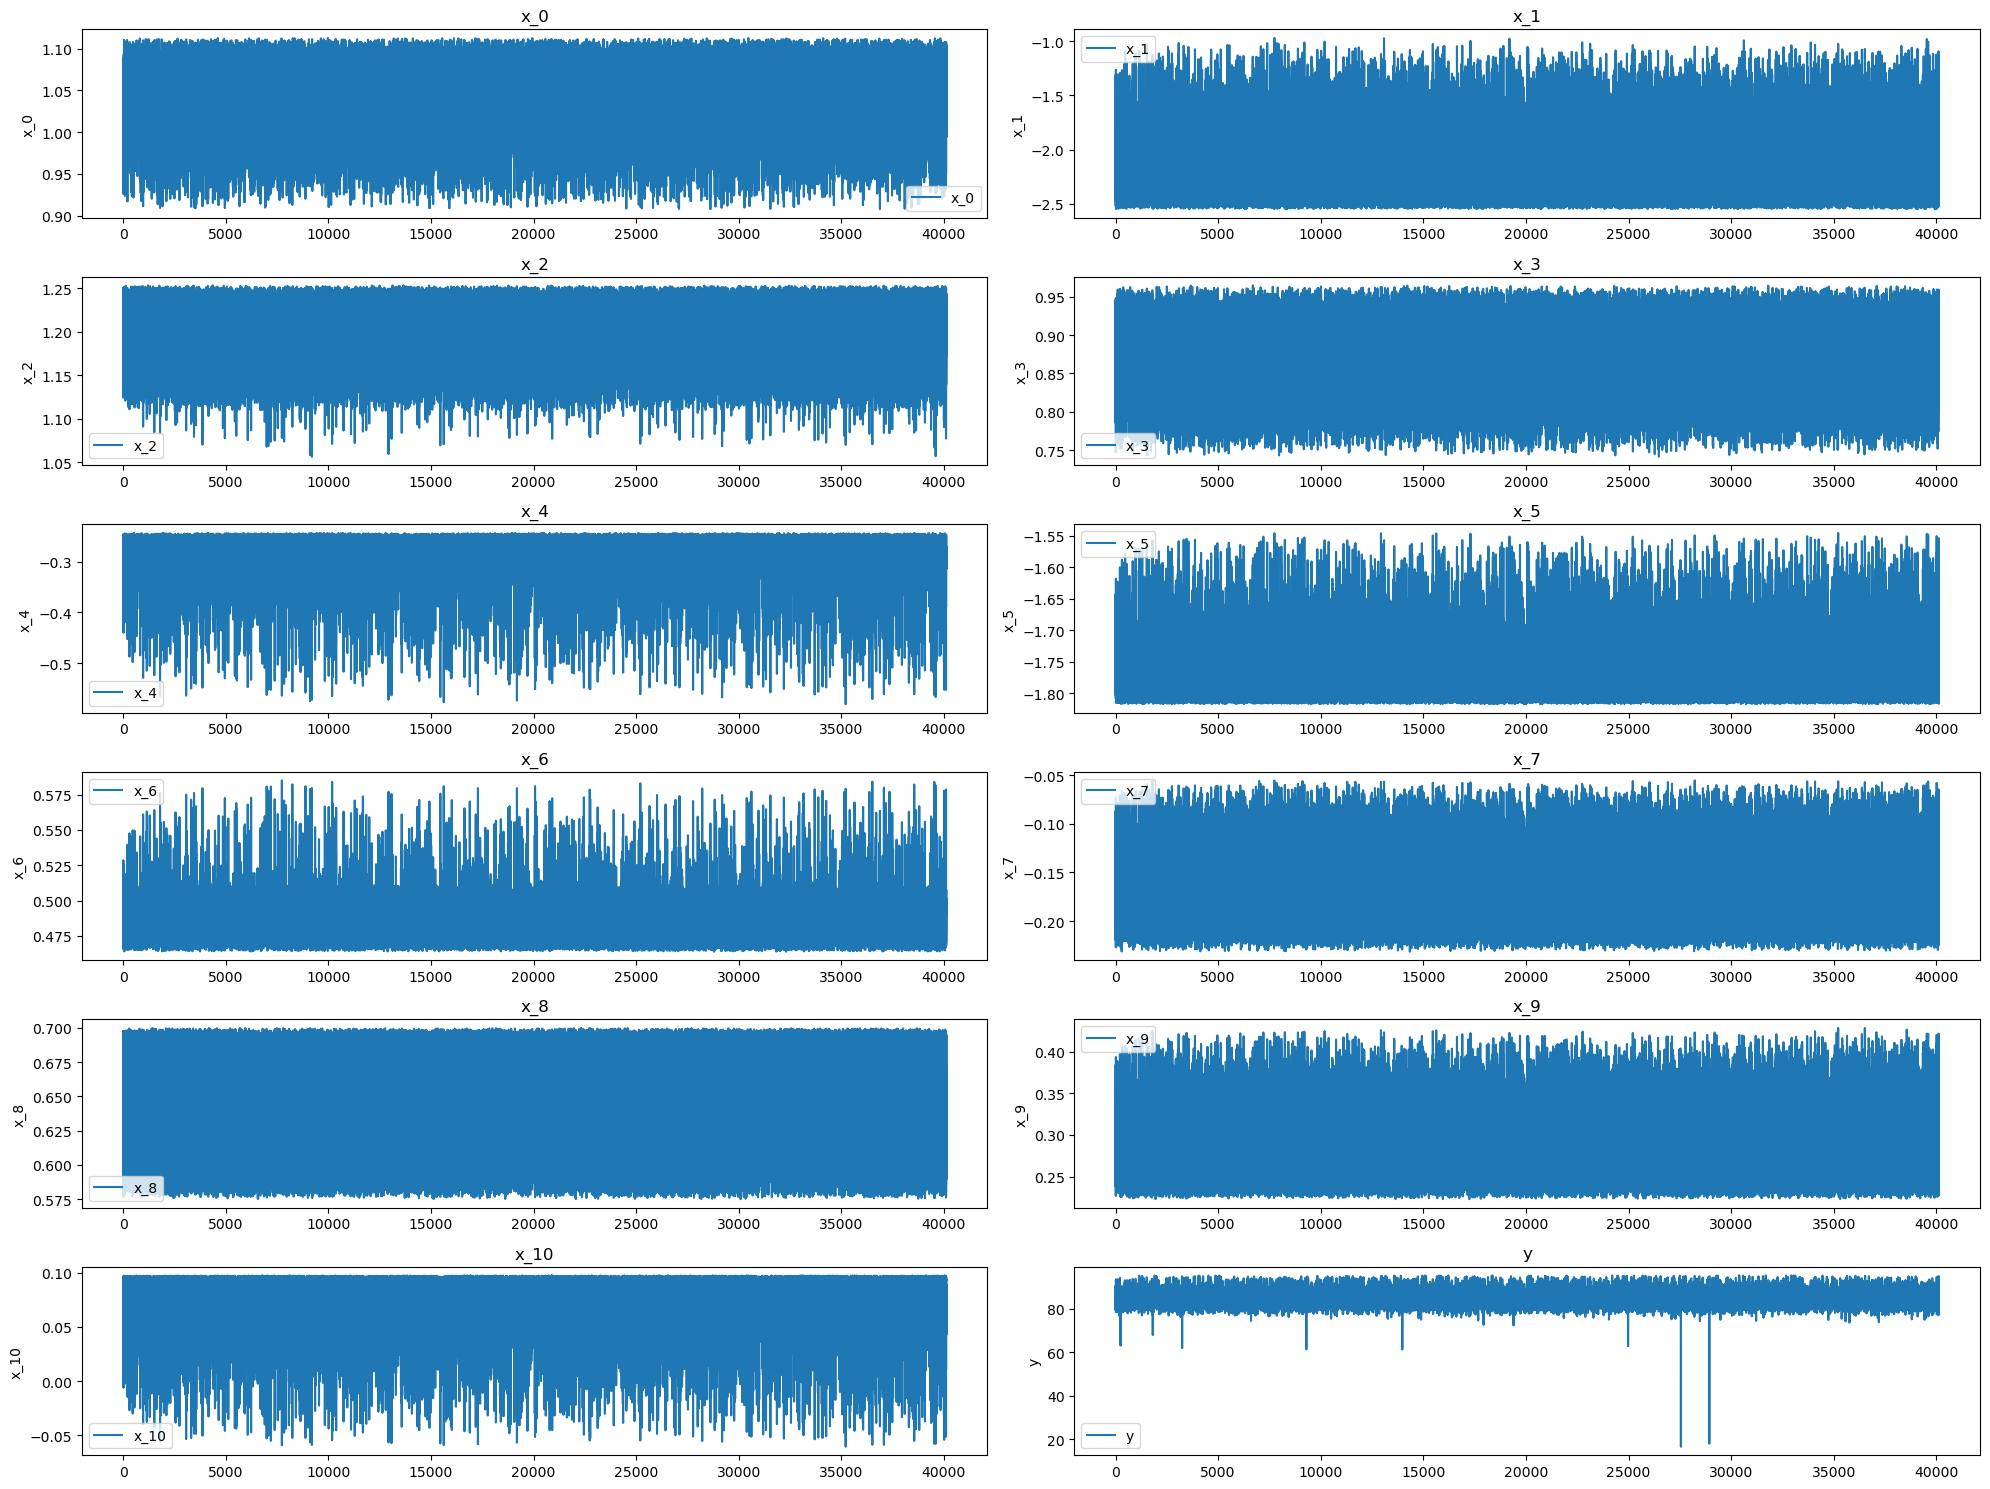

In [6]:
# Determine the number of columns and rows for the subplot grid
num_cols = 2
num_rows = 6

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df.columns[1:]):
    if i < len(axes):
        axes[i].plot(df.index, df[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

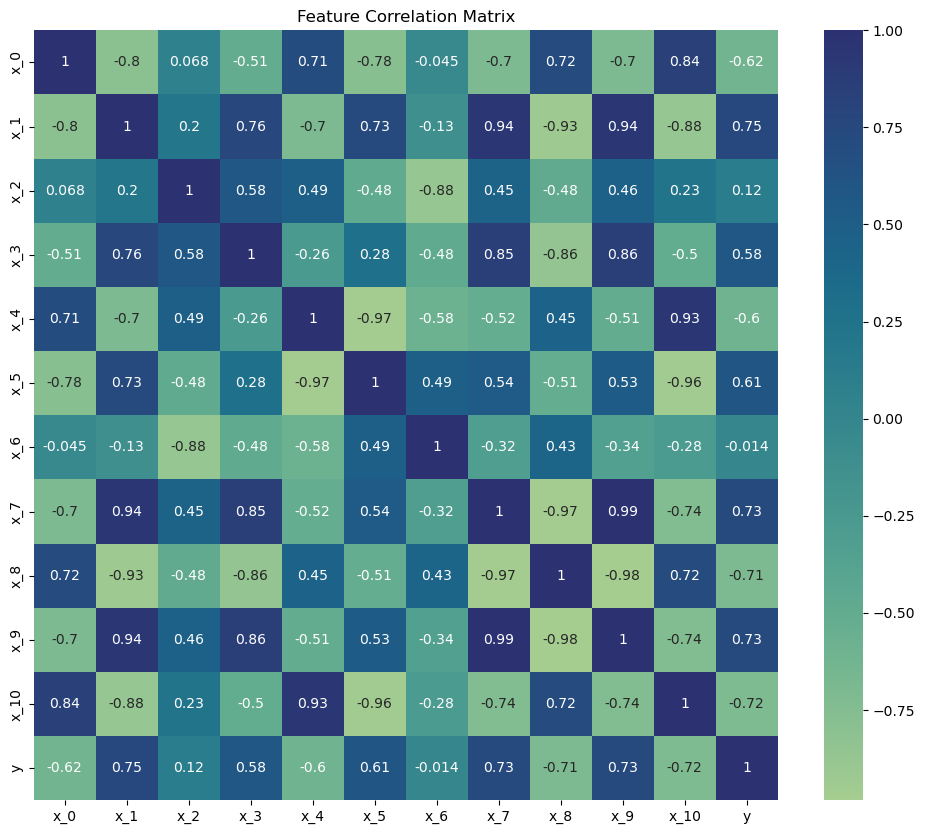

In [7]:
# Check for correlations
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()

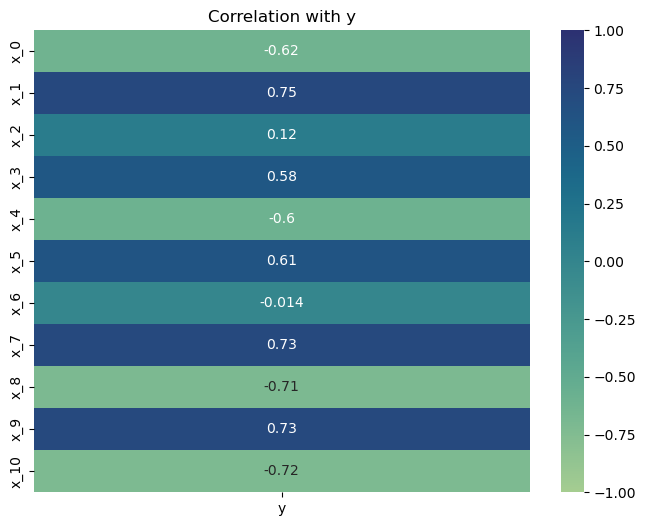

In [8]:
selected_columns = ['y', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10']
correlation_matrix = df[selected_columns].corr()

correlation_with_y = correlation_matrix[['y']].drop('y')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_y, annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlation with y')
plt.show()

## Test.csv

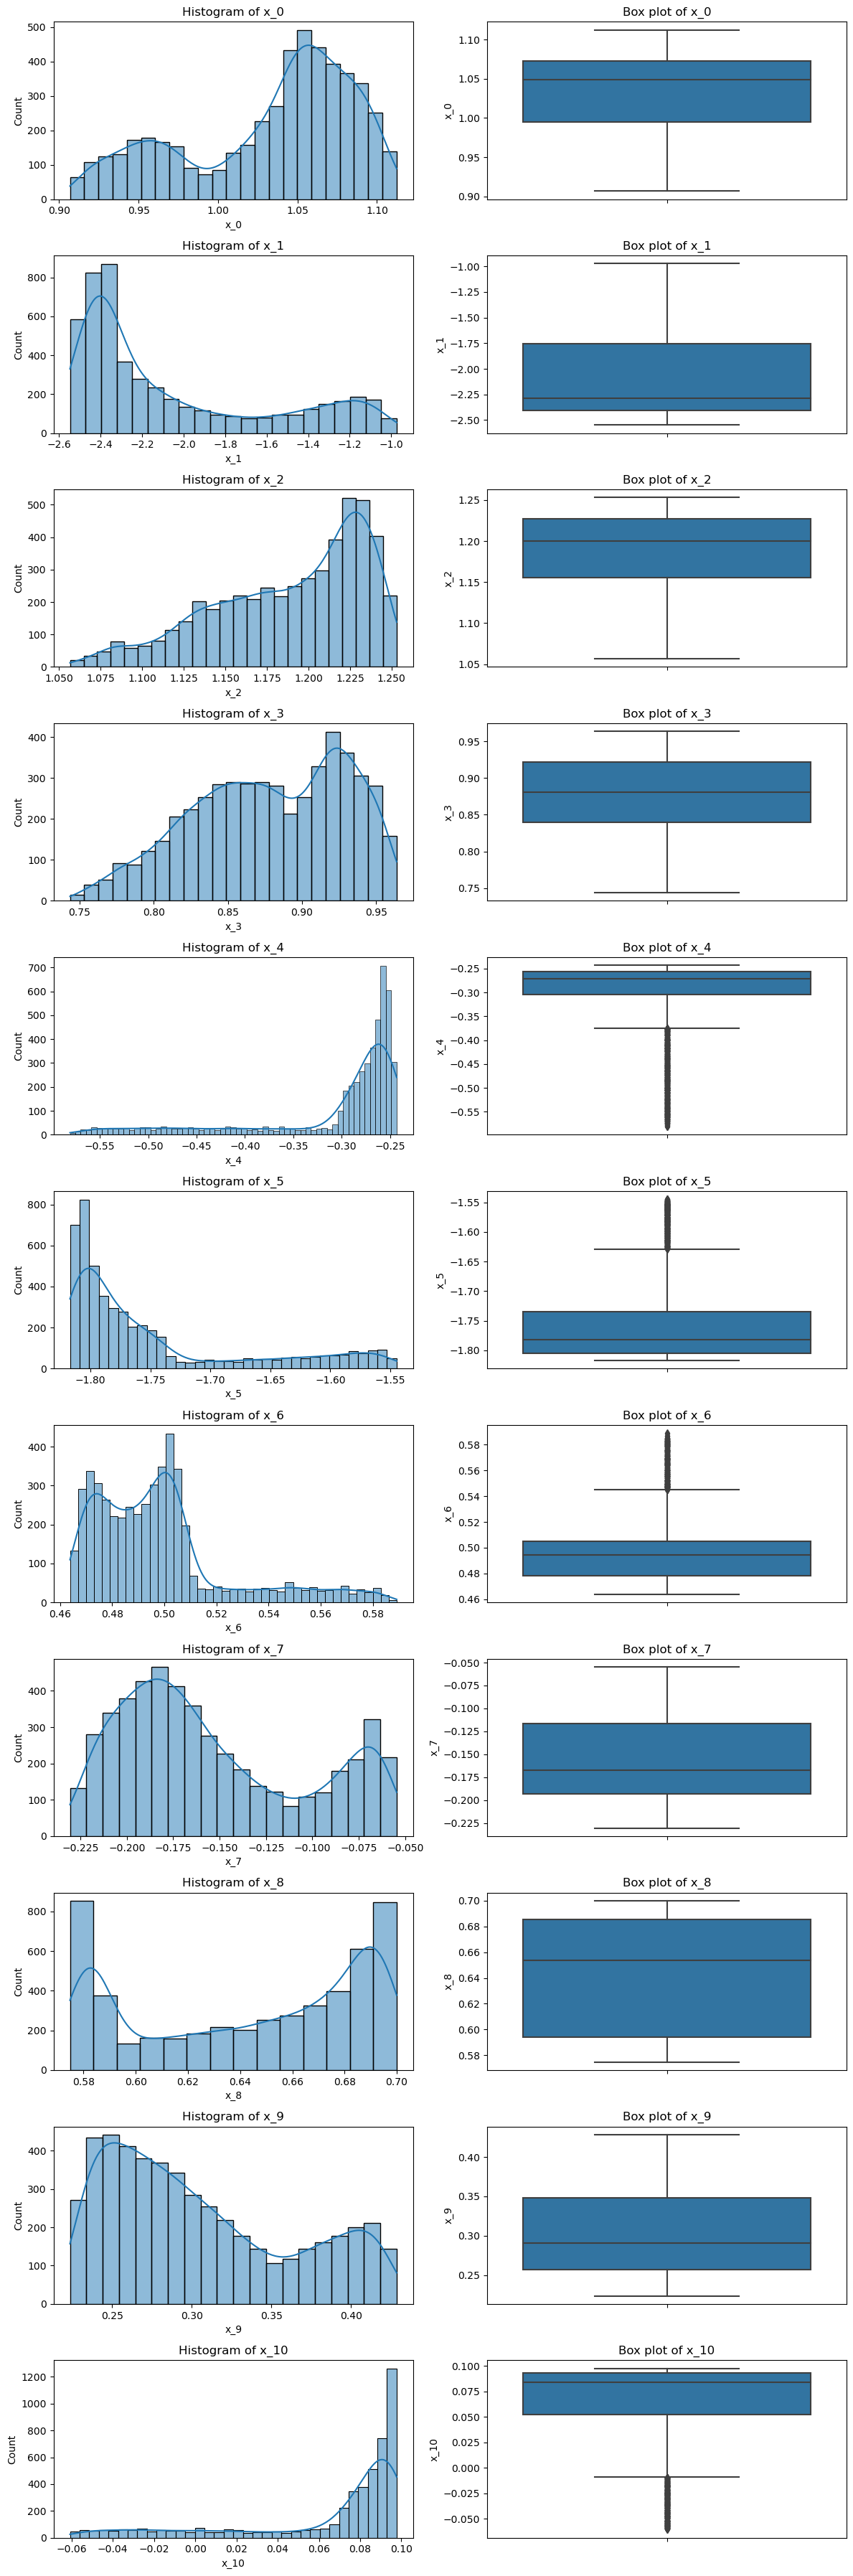

In [9]:
# Create combined plots (histogram + boxplot)
fig, axes = plt.subplots(len(df2.columns) - 1, 2, figsize=(12, len(df2.columns) * 3))
axes = axes.ravel()

for i, col in enumerate(df2.columns[1:]):  # Skip the ID column
    # Histogram
    sns.histplot(df2[col], ax=axes[2*i], kde=True)
    axes[2*i].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(y=df2[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

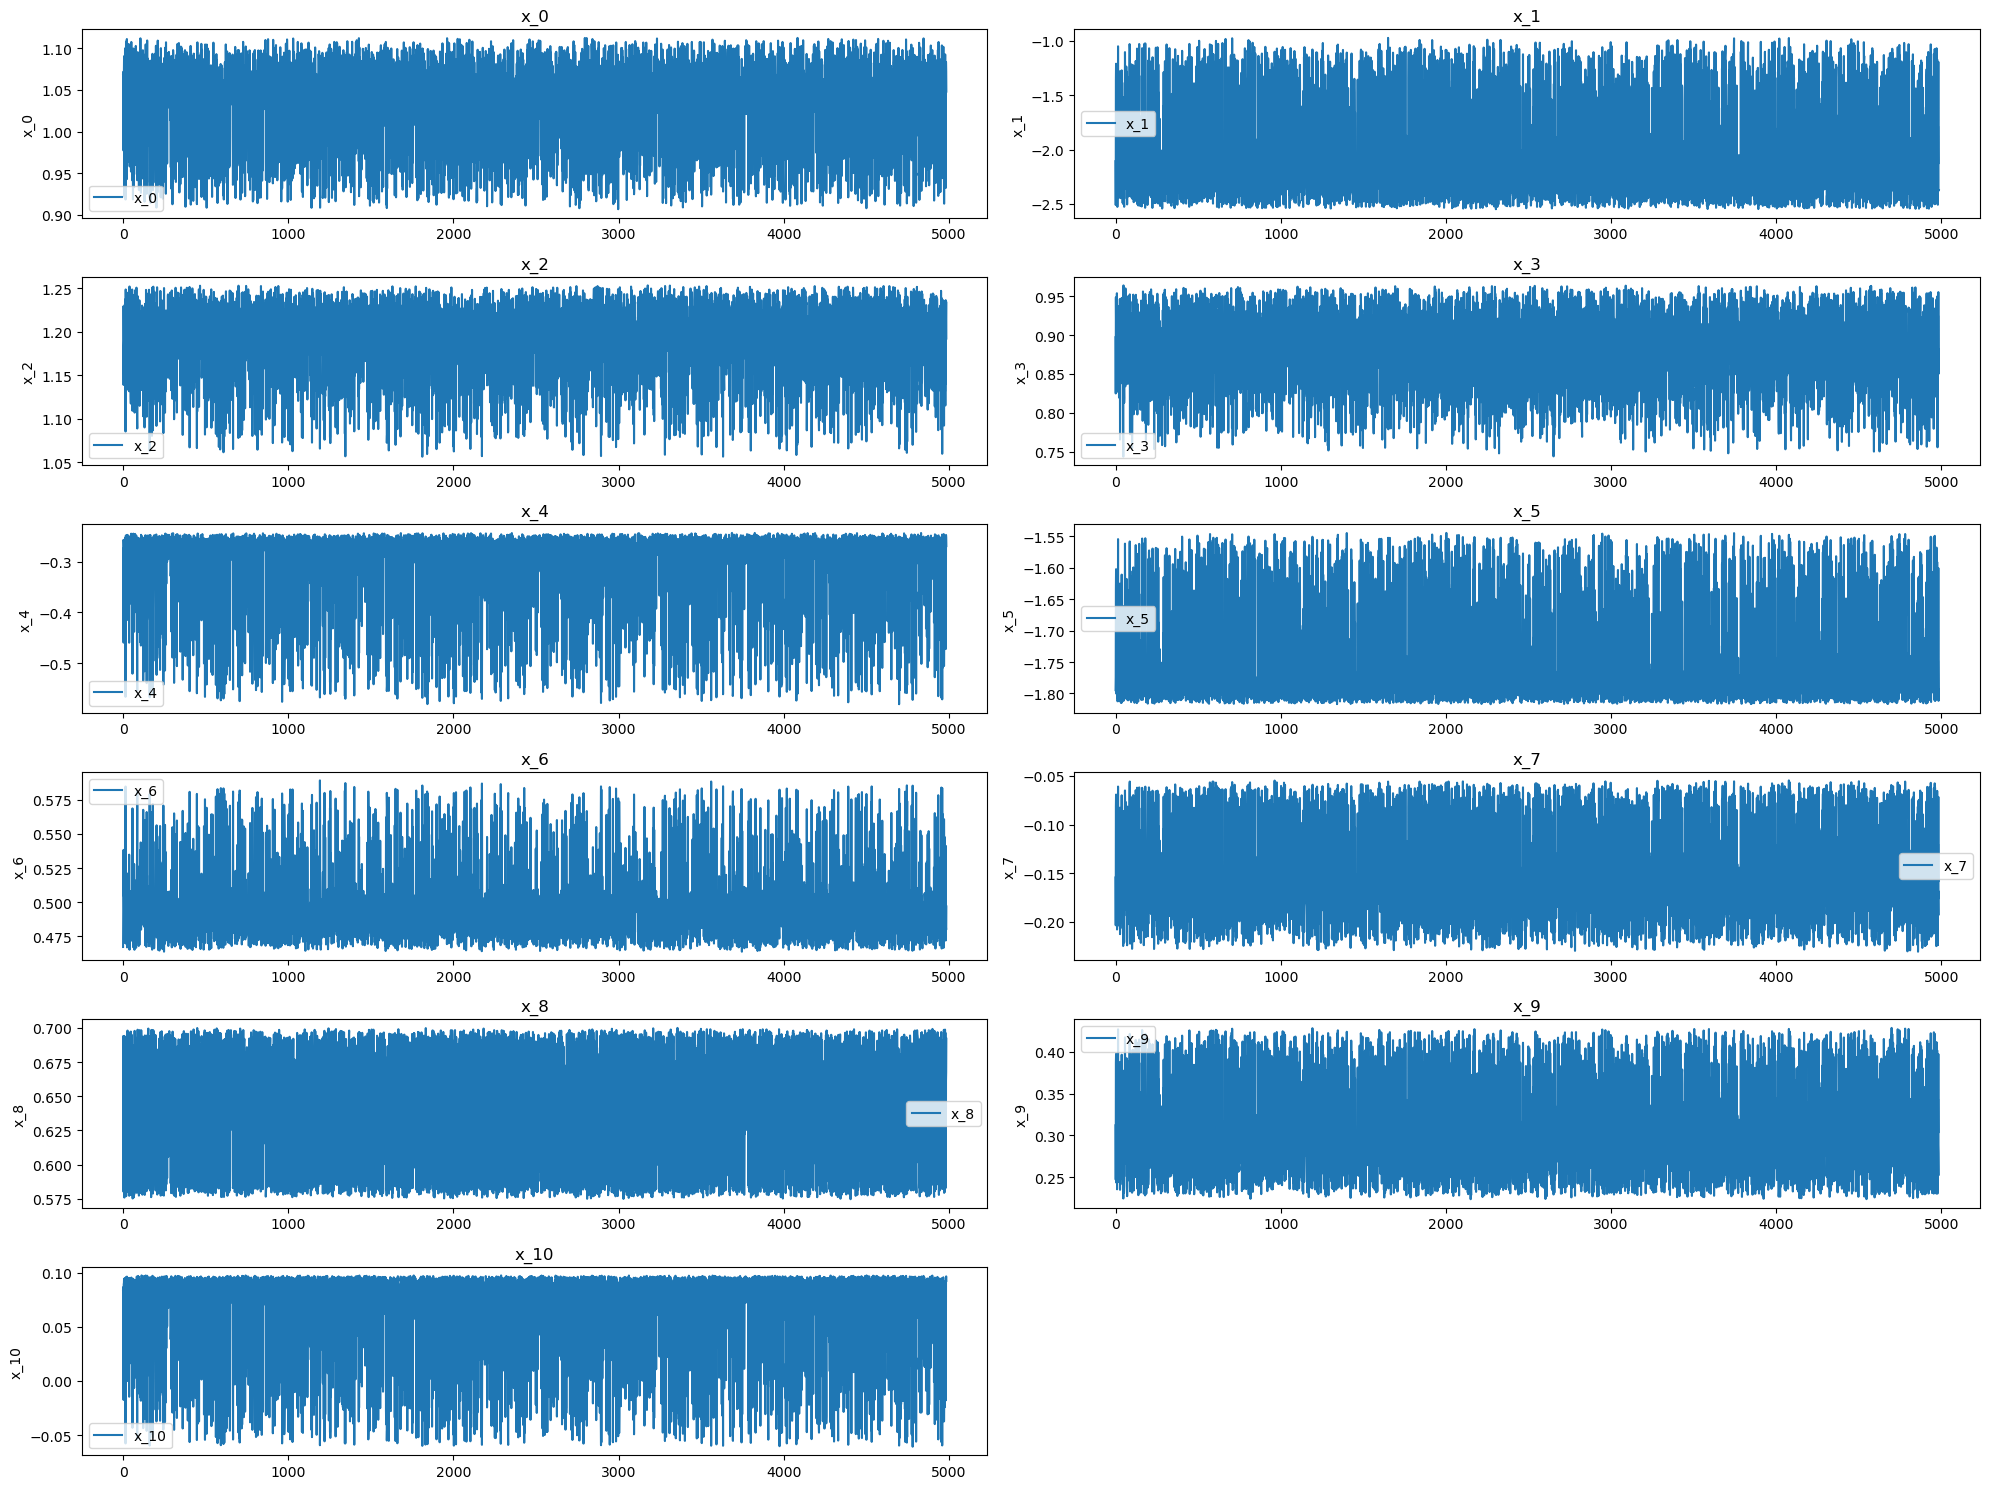

In [10]:
# Determine the number of columns and rows for the subplot grid
num_cols = 2
num_rows = 6

# Create the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a time series
for i, column in enumerate(df2.columns[1:]):
    if i < len(axes):
        axes[i].plot(df2.index, df2[column], label=column)
        axes[i].set_title(column)
        # axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

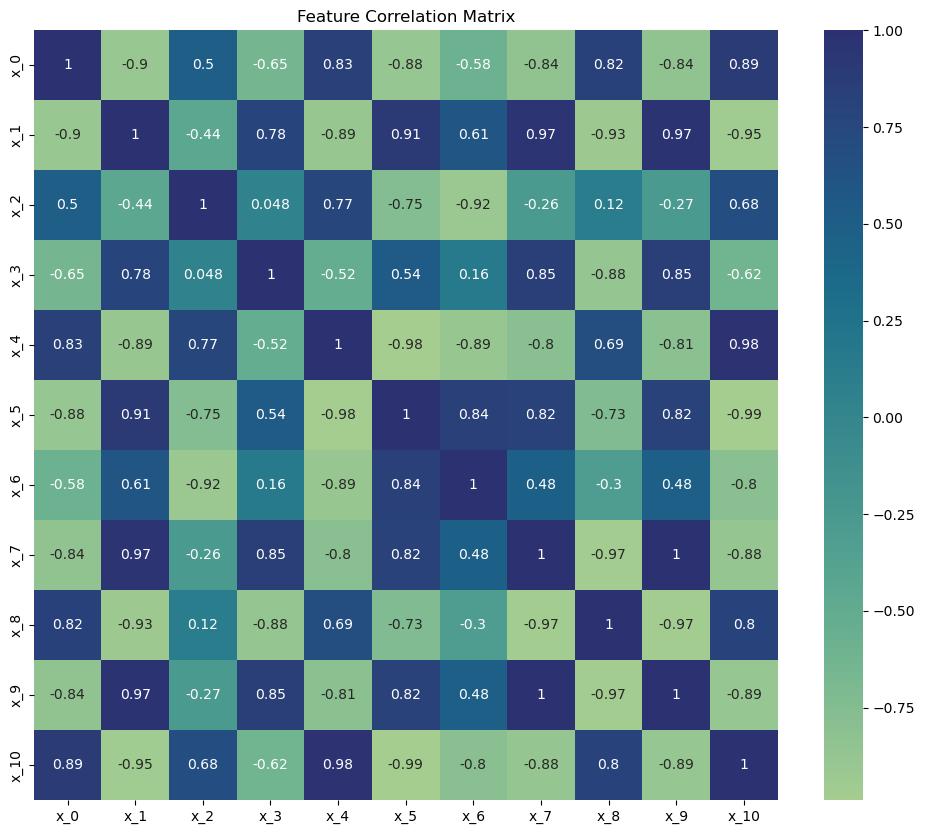

In [11]:
# Check for correlations
correlation_matrix = df2.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Feature Correlation Matrix')
plt.show()